In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 	Mathematics in Machine Learning

Curello Salvatore Junior (Matr. s268066)

# Heart Failure Data Analysis



# Introduction

This study was focused on survival analysis of heart failure patients who were admitted to the *Institute of Cardiology and Allied hospital Faisalabad* (Pakistan) during April-December (2015).

Heart failure is the state in which muscles in the heart wall get fade and enlarge, limiting heart pumping of blood. The main reason behind heart failure include coronary heart disease, diabetes, high blood pressure and other diseases like HIV, alcohol abuse or cocaine, thyroid disorders, excess of
vitamin E in body, radiation or chemotherapy, etc.

In this context, electronic health records (EHRs, also
called medical records) can be considered a useful
resource of information to unveil hidden and non-obvious
correlations and relationships between patients’ data, not
only for research but also for clinical practice and
for debunking traditional myths on risk factors.

Machine learning applied to medical records, in particular, can be an effective tool both to predict the survival
of each patient having heart failure symptoms,
and to detect the most important clinical features (or risk
factors) that may lead to heart failure. 

In this work, first, we present our dataset and its attributes description. Then we focus on the Exploratory Data
Analysis (EDA) and in order to fix the slight imbalance of the dataset we applied different oversampling techniques. These steps are essential for the models creation,
which goal is to predict a boolean response on patience survival given training samples. We will apply
several models to address this task: *Decision Tree, Random Forest, Logistic Regression* and *Support Vector Machine*. We analyze these models according different set of hyperparameters and for each oversampling technique mentioned above. The last part of this work shows a comparison of the different results obtained after the application of the models.

## Required Libraries and Utilities

All the code is implemented in python. The following show the different libraries that have been used.



In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold

from sklearn.feature_selection import mutual_info_classif
from scipy.stats import chi2_contingency
from scipy.stats import chi2

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from imblearn.over_sampling import SMOTE, SMOTENC

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.core.display import HTML

# EDA (Exploratory Data Analysis)

### Dataset Description
The dataset used to perform the analysis is the **Heart failure clinical records Dataset**. The lastest version has been elaborated by D. Chicco (2020) and available in this [link](https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records).

It is constitute of 299 patients of heart failure comprising of 105 women and 194 men which their age is in the range [40, ..., 95]. 

It contains 11 features on which the analysis are based, then the *time* (which indicates the follow-up period) and the *DEATH_EVENT* which will be the target variable during the analisys. The following table [1] shows a short explaination for each of them together with their units of measure and range:

| **Feature**              | **Explaination**                                          | **Measurement**    | **Range**          |
|--------------------------|-----------------------------------------------------------|--------------------|--------------------|
| Age                      | Age of the patient                                        |       _Years_      | [40, …, 95]        |
| Anemia                   | Decrease of red blood cells or hemoglobin                 |      _Boolean_     | 0, 1               |
| High Blood Pressure      | If the patient has hypertension                           |      _Boolean_     | 0, 1               |
| Creatinine phosphokinase | Level of the CPK enzyme in the blood                      |       _mcg/L_      | [23, …, 7861]      |
| Diabetes                 | If the patient has diabetes                               |      _Boolean_     | 0, 1               |
| Ejection fraction        | Percentage of blood leaving the heart at each contraction |    _Percentage_    | [14, …, 80]        |
| Platelets                 | Platelets in the blood                                    | _kiloplatelets/mL_ | [25.01, …, 850.00] |
| Sex                      | Woman or man                                              |      _Binary_      | 0, 1               |
| Serum creatinine         | Level of serum creatinine in the blood                    |       _mg/dL_      | [0.50, …, 9.40]    |
| Serum sodium             | Level of serum sodium in the blood                        |       _mEq/L_      | [114, …, 148]      |
| Smoking                  | If the patient smokes or not                              |      _Boolean_     | 0, 1               |
| Time                     | Follow-up period                                          |       _Days_       | [4, …, 285]        |
| Death Event (Target)     | If the patient deceased during the follow-up period (0=survived, 1=death)      |      _Boolean_     | 0, 1               |

We start with a visualization of the Dataset as shown below:

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/ProgettoMML/heart_failure_clinical_records_dataset.csv' # path of the dataset
df = pd.read_csv(path)
df["platelets"] = df["platelets"]/1000
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265.00000,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263.35803,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162.00000,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210.00000,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327.00000,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155.00000,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270.00000,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742.00000,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140.00000,1.4,140,1,1,280,0


## Missing Values

An important step of data exploration includes the detection of missing values. Possible solutions for this type of problem consists in deleting completely the entries which contain the missing value, estimating its value or replacing it with the mean of all the other values associated to that feature. For this reason, a null entries check is performed:

In [ ]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

No missing values are detected as already indicated in the description of the dataset provided by the authors.

## Time Attribute
We decided to focus our attention only on the clinical features and to try to discover something meaningful about them. For this reason, let's have a look on the time attribute to decide whether it should be included as predictor or not. 
It is in fact intuitive to see that for large time
value $t$, the outcome is more likely to be that the patience survived during this follow-up period, for the
simple reason that we can reasonably think that until day $t − 1$ the patience was alive. 

In this sense, it is important to notice that time does not reflect the health state of a patience, and we think that in the model it results being a hint to the classifier towards the right prediction. If this is true, the goal of giving a correct prediction taking into account only the clinical situation of the patience, cannot be reached because the model becomes weaker in identifying patterns between clinical health features and the response.

For this reason we conducted a preliminary analysis trying to visualize, through a boxplot, the behaviour of the *time* feature. 

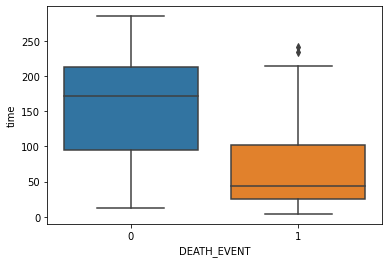

In [ ]:
sns.boxplot(x='DEATH_EVENT', y=df["time"], data=df)
df = df.drop(columns=['time'])

As we can see, it is possible to identify a link between death event and time: when time is small, the *DEATH_EVENT* is
more likely to be equal to 1 while when the time is large, it is more likely to be equal to 0. 

In fact, we see a large shift in the time median for the 2 groups, where approximately for 0(survived) response its value is 170 days versus 50 days in case of *DEATH_EVENT* equals 1(death).
The explainations of the hypothesis and this preliminary analysis of the plot leads us to discard time attribute
from the predictors, and the goal of our model becomes to predict death or survival of the patience exclusively
on the base of its clinical features.

## Data visualization

The dataset is composed of both categorical and numerical features. In particular, the categorical features are: *anaemia, diabetes, high_blood_pressure, sex* and *smoking* while the numerical features are *age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine* and *serum_sodium*.

### Numerical Features

A preliminary exploration of the data is useful to better understand its characteristics. To do that we can use boxplots for quantitative variables.
Boxplots are a great tool for exploring the data distribution and look for outliers. With boxplots we can summarize the data distribution in a nice visualization. We have that the lower part of the wisher is the minimum computed considering the interquartile range: $Q1 - 1.5 x IQR$ where $Q1$ is the first quartile (25% percentile) and $IQR$ is the interquartile range which is the difference between $Q3$ (3rd quartile) and $Q1$. The lower edge of the rectangle is $Q1$ while the line in the middle is the median $Q2$; the upper edge of the box is $Q3$. The upper whisher is the maximum computed considering $Q3 + 1.5 x IQR$. The points that are outside the whiskers are considered outliers.

![boxplot](https://github.com/salvatorecurello/Heart-Failure-Data-Analysis/blob/main/images/boxplot.jpg?raw=true)

The following are the boxplots of the quantitative features:

In [ ]:
categorical = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
numerical = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']

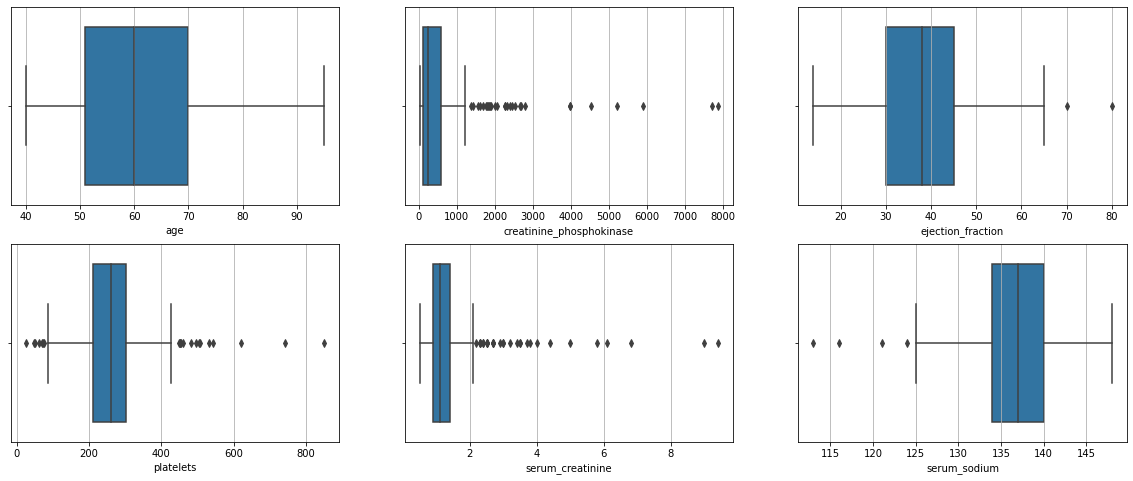

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(ncols=3, nrows=2, figsize=(20,8))   
sns.boxplot(x=df['age'], ax=ax1)
ax1.xaxis.grid(True)
sns.boxplot(x=df['creatinine_phosphokinase'], ax=ax2)
ax2.xaxis.grid(True)
sns.boxplot(x=df['ejection_fraction'], ax=ax3)
ax3.xaxis.grid(True)
sns.boxplot(x=df['platelets'], ax=ax4)
ax4.xaxis.grid(True)
sns.boxplot(x=df['serum_creatinine'], ax=ax5)
ax5.xaxis.grid(True)
sns.boxplot(x=df['serum_sodium'], ax=ax6)
ax6.xaxis.grid(True)

#fig.savefig("/content/drive/MyDrive/Colab Notebooks/ProgettoMML/images/boxplots.png")

### Categorical Features

Here, instead, we show the countplots for the categorical attributes:

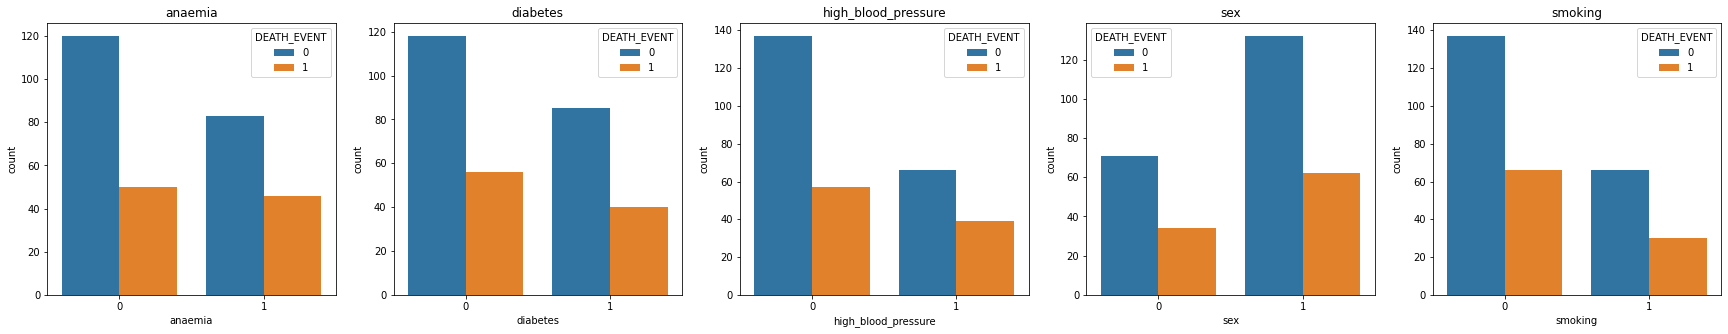

In [ ]:
plt.figure(figsize=(30, 5))

for i, cat in enumerate(categorical):
    plt.subplot(1, 5, i+1)
    plt.title(cat)
    sns.countplot(data=df, x=cat, hue="DEATH_EVENT", linewidth=1)

#plt.savefig("/content/drive/MyDrive/Colab Notebooks/ProgettoMML/images/countplots_cat.png")

## Correlation Analisys

In order to analyze the dataset and its attributes, it is important to understand the relationships between them. 
Correlation Matrix, which is made of correlation coefficients, helps us to simply see those relations.
Correlation is a function of the covariance. The difference is that correlation values are standardized
whereas, covariance values are not. The correlation coefficient of two variables can be computed by
dividing the covariance of these variables by the product of the standard deviations of the same
values. The Standard Deviation, essentially, measures the absolute variability of a datasets’ distribution.


When we divide the covariance values by the standard deviation, we essentially scale the value
down to a limited range of [-1, +1].
The closer the result to 1 means that there is a positive correlation between the variables, whereas the closer the result to -1 means the opposite. If the result is close to 0, this means that there is no relationship between the variables. In summary:

$$\rho(x,y) = \frac{COV(x,y)}{S_{x}S_{y}}$$     
where $COV(x,y)=\sum_{i-1}^{n}\frac{(x_{i}-\mu_{x})(y_{i}-\mu_{y})}{n-1}$

A heatmap of the correlation matrix is plotted using Pearson's correlation, where lighter cell colors indicate higher correlation values.

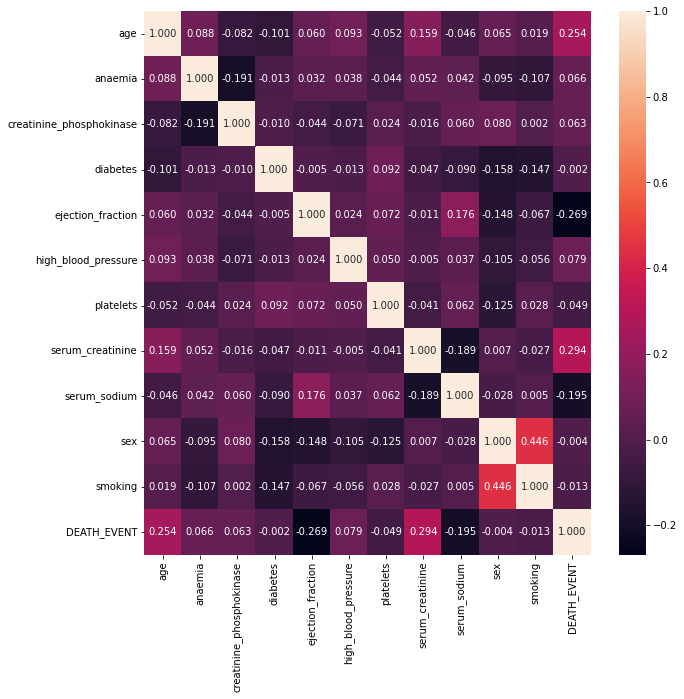

In [ ]:
fig , ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, ax=ax, fmt='.3f')

#fig.savefig("/content/drive/MyDrive/Colab Notebooks/ProgettoMML/images/corr_matrix.png")

We can see that the features are quite uncorrelated with the exception of *sex* and *smoking* that seems to be slightly positively correlated.

## Class unbalance

In order to avoid biased results, it is important to check for class imbalance. To do so, we count the records with DEATH_EVENT equal to 0 and those with DEATH_EVENT equal to 1.

The result is shown below using a countlot:


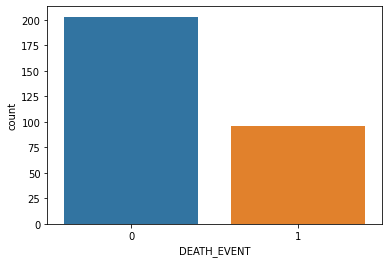

In [ ]:
countplot = sns.countplot(x= df["DEATH_EVENT"])
fig = countplot.get_figure()
#fig.savefig("/content/drive/MyDrive/Colab Notebooks/ProgettoMML/images/countplot.png")

| **Class**              | **Value Counts**                                          | **Percentage (%)**    | 
|--------------------------|-----------------------------------------------------------|--------------------|
| 0 (survived)                    | 203                                        |       67.89      |
| 1 (deceased)                  | 96               |     32.11|

Even if not so strong the dataset is 
slightly imbalanced with 67.89% (203) survival cases & 32.11% (96) death events. In this situation the model could become more inclined towards learning and predicting the negative examples than the positive (death) cases.
To overcome this issue three different technique of re-balancing are applied. Due to the fact that the dataset is not so big we decided to oversample the minority class, in our case *DEATH_EVENT=1*.

An example is shown below, after having applied a random oversampling technique on the whole dataset (during our analysis each oversampling technique will be applied only in the training set in order to avoid problem of *data leakage*).


In [ ]:
def oversampling(X, y):
  oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)
  X_over, y_over = oversample.fit_resample(X, y)
  return X_over, y_over

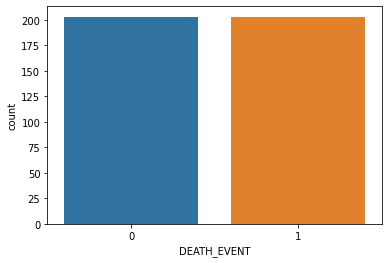

In [ ]:
df_to_oversample = df.drop(columns=['DEATH_EVENT'])
_, y_oversampled = oversampling(df_to_oversample, df["DEATH_EVENT"])
countplot= sns.countplot(x=y_oversampled)
fig = countplot.get_figure()
#fig.savefig("/content/drive/MyDrive/Colab Notebooks/ProgettoMML/images/countplot_balanced.png")

As we can see the dataset is now balanced with equal number of samples for the two classes of *DEATH_EVENT*.

### Random Oversampling
*Random oversampling* is the process of randomly duplicating examples from the minority class and adding them to the training dataset.
It is based on the intuition that since we are not able to sample more examples from the true distribution, we sample them from the empirical distribution coming from the examples that we already have.
Of course, this method has some drawbacks because it may increase the likelihood of overfitting, especially for higher over-sampling rates. Moreover, it may decrease the classifier performance and increase the computational effort.

It is really important to underline that this technique must be applied only in the training set because oversampling the whole dataset before splitting into train and test would mean that the test data will likely have duplicated samples from the training set and so it means that testing performance would not be necessarily computed on unseen data (data leakage problem). This is the main reason why the oversampling should be done after splitting to train-test, and not before.

### SMOTE
By randomly replicating instances in the dataset, the learned model might fit the training data too closely and, as a result, not generalize well on unseen instances.

In order to overcome this issue, *Chawla et al.* developed a method of creating synthetic instances instead of merely copying existing instances in the dataset. This techniques is known as **SMOTE** (**S**ynthetic **M**inority **O**ver-sampling **TE**chnique) [2]. As mentioned, in SMOTE, the training set is altered by adding synthetically generated minority class instances, causing the class distribution to become more balanced. We say that the instances created are synthetic, as they are, in general, new minority instances that have been extrapolated and created out of existing minority class instances.

The various steps involved in SMOTE are the following:

- Step 1: Setting the minority class set $A$, for each $x \in A$, the k-nearest neighbors of $x$ are obtained by calculating the Euclidean distance between $x$ and every other sample in set $A$.

- Step 2: The sampling rate $N$ is set according to the imbalanced proportion. For each $x \in A$, $N$ examples (i.e $x_1, x_2, …, x_n$) are randomly selected from its k-nearest neighbors, and they construct the set $A_1$ .

- Step 3: For each example $x_k \in A_1$ ($k=1, 2, 3, …, N$), the following formula is used to generate a new example: $x' = x + rand(0, 1) * \mid x - x_k \mid$ where $rand(0, 1)$ denotes a random number between 0 and 1.

This approach is effective because new synthetic examples from the minority class are created that are plausible, that is, are relatively close in feature space to existing examples from the minority class.
A drawback of this approach is that synthetic examples are created without considering the majority class, possibly resulting in ambiguous examples if there is a strong overlap for the classes.

![smote example](https://github.com/salvatorecurello/Heart-Failure-Data-Analysis/blob/main/images/smote_example.png?raw=true)



In [ ]:
def smote(X, y):
  oversample = SMOTE(random_state=42)
  X_over, y_over = oversample.fit_resample(X, y)
  return X_over, y_over

### SMOTE-NC
The classic implementation of SMOTE has been applied just to introduce another version of smote called *Synthetic Minority Over-sampling Technique for Nominal and Continuous* (**SMOTE-NC**).
 
Since our dataset contains mixed data types (continuous and categorical features) the application of SMOTE is not the best choice. For example, if we consider the categorical feature *sex*, oversampling this data with SMOTE, could end up with oversampled data such as 0.67 or 0.5, which does not make sense at all. 
This is the reason why we need to apply SMOTE-NC when we have cases of mixed data. Basically, we denote which features are categorical, and SMOTE-NC would resample the categorical data instead of creating synthetic data. Howewer, both SMOTE and SMOTE-NC have been applied to all the models.

SMOTE-NC works by searching k number of nearest neighbors for an instance $x_i$ in the minority class, chosen at random. The metric used in order to determine the neighbours is adjusted for the presence of nominal features in the following way. First we compute the median of standard deviations of all continuous features for the minority. If the nominal features differ between a sample and its potential nearest neighbors, then this median is included in the Euclidean distance
computation. We use median to penalize the difference of nominal features by an amount that is related to the typical difference in continuous feature values. Then, we compute the Euclidean distance between the feature vector for which k-nearest neighbors are being identified (minority class sample) and the other feature vectors (minority class samples) using the continuous feature space.
For every differing nominal feature between the considered feature vector and its potential nearest-neighbor, include the median of the standard deviations previously computed, in the Euclidean distance computation.
Finally, we populate the synthetic sample. The continuous features of the new synthetic minority class sample are created using the same approach of SMOTE as described earlier. The nominal feature is given the value occuring in the majority of the k-nearest neighbors [2].

In [ ]:
def smoteNC(X, y, cat_features):
  oversample = SMOTENC(categorical_features=cat_features, random_state=42)
  X_over, y_over = oversample.fit_resample(X, y)
  return X_over, y_over

In [ ]:
def make_oversampling(X, y, resampling_method):
  if resampling_method == 'oversampling':
    X_oversampled, y_oversampled = oversampling(X, y)
  elif resampling_method == "smote":
    X_oversampled, y_oversampled = smote(X, y)
  elif resampling_method == "smoteNC":    
    categorical_features=[X.dtypes==int]
    X_oversampled, y_oversampled = smoteNC(X, y, categorical_features)
  
  return X_oversampled, y_oversampled

# Data Preparation

A common problem in machine learning is that the models need specific hyperparameters so every  time we want to apply some machine learning algorithms we must perform a tuning phase in which we fit different models with different parameters and we keep the model. A common error is to perform this tuning on the training set, this would cause major overfitting. It could happend, in fact, that the model achiveves fantastic performances on the traning set but very poor on the test set. For this reason there are several validation approaches that we can use:
* **Holdout**: the Holdout method is the most simple validation technique and it consists in splitting the data set in three set: training, valdation and testing. The training set is used for training the model, the validation set to evaluate the model in order to find the best parameters and finally the test set is used for testing the model performances on data which was never seen by the algorithm.
* **K-fold Cross Validation**: The problem with the holdout method is that if the dataset has not so many samples we can incur in the situation of not using enough data for training. To solve this problem we can use cross validation. The goal of this method is to give an accurate estimate of the metrics that we are evaluating without wasting too much data. In this case the training set is partitioned in $k$ folds of size $m/k$ where $m$ is the number of samples of the dataset. Then we leave one fold out and we train on the remaining $k-1$ folds. We evaluate on the fold which was left out from the training and we repeat this procedure $k$ times, one from each fold, obtaining $k$ cross validation scores. Then we compute the avarage of these scores. Usually, this method is used for small and medium datasets in order to have more accurate scores with respect to holdout. With the K-fold CV the training algorithm has to be rerun from scratch $k$ times, this means that it is computationally expensive compared to holdout that, usually, is used when the dataset is big as it is faster than CV and the data is enought to ensure convergence of the model on the training set.
* **Leave One Out Cross Validation (LOOCV)**: it is a particular case of CV in which we use $m$ folds, where $m$ is again the number of samples of the dataset. Then at each step we use only one sample for the validation and the others for training and finally we average the result. Due to the fact that this process is a very expensive technique and can require a lot of time, it is usually used for very small datasets. 

In our case, we considered 20% of the dataset as test set. Moreover, we applied a 5-fold stratified CV in which the folds are made by preserving the percentage of samples for each class. Stratified sampling will force the same class balance on the train and test dataset as the original data.

In [ ]:
X_train, X_test = train_test_split(df, test_size = 0.20, random_state=42)

In [ ]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop= True, inplace=True)

In [ ]:
X_train_holdout = X_train.drop(columns='DEATH_EVENT')
y_train_holdout = X_train['DEATH_EVENT']

In [ ]:
X_test_holdout = X_test.drop(columns='DEATH_EVENT')
y_test_holdout = X_test['DEATH_EVENT']

## Data standardization

As shown in the Data Visualization section the features have different units of measurement.

Features measured at different scales don't contribute equally to the analysis and might end up creating bias.

In order to avoid this, a standardization process is applied.

To standardize data, we compute the mean and standard deviation for each feature, subtract the mean from each value, and divide by the standard deviation.

The following formula summarize it:

$${\displaystyle z={\frac {(x-{\bar {x}})}{\sigma }}}$$

Where ${\displaystyle x}$ is the original feature vector, ${\displaystyle {\bar {x}}}$ is the mean of that feature vector, and $\sigma $ is its standard deviation.

Below we can visualize the standadized version of the training set:

In [ ]:
df_to_standardize_train = X_train_holdout[numerical]
df_to_standardize_test = X_test_holdout[numerical]

In [ ]:
scaler = StandardScaler()
scaler.fit(df_to_standardize_train)
X_train_holdout_st = pd.DataFrame(scaler.transform(df_to_standardize_train), columns = df_to_standardize_train.columns)
X_test_holdout_st = pd.DataFrame(scaler.transform(df_to_standardize_test), columns = df_to_standardize_test.columns)

In [ ]:
X_train_holdout_st = pd.concat([X_train_holdout_st, X_train_holdout[categorical]], axis=1)
X_test_holdout_st = pd.concat([X_test_holdout_st, X_test_holdout[categorical]], axis=1)
X_train_holdout_st['DEATH_EVENT'] = y_train_holdout
X_test_holdout_st['DEATH_EVENT'] = y_test_holdout

In [ ]:
X_train_holdout_st

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,1.164202,-0.350370,-2.000867,-1.439568,-0.188705,0.131259,1,0,0,1,0,1
1,1.164202,-0.505933,-0.022672,-0.408476,1.120602,-0.545811,0,0,1,1,0,1
2,-0.032819,-0.500642,-0.710740,1.345442,0.113442,-0.094431,1,1,0,1,0,1
3,-0.756645,-0.471011,-0.710740,-0.472255,-0.692285,-0.094431,0,0,0,1,1,0
4,2.750989,0.005203,-0.022672,0.009892,0.445805,-0.545811,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
234,-0.032819,-0.450904,0.149345,-0.652962,-0.390137,-0.094431,1,1,1,0,0,0
235,-0.255554,0.005203,-0.280697,-1.492717,-0.490853,0.582639,0,1,0,1,1,0
236,-0.506099,0.180873,0.579388,0.006086,-0.087989,0.131259,0,0,0,1,0,0
237,-1.424765,0.005203,-0.710740,0.009892,0.214158,-1.448572,0,1,1,1,1,0


# Feature selection 

We perform feature selection to identify the most relevant features to include in the analysis. As previously mentioned, the dataset contains mixed data types; therefore, different selection techniques should be applied accordingly.

In particular, first we use Mutual Information then we use Chi-squared test to further test the dependence of the categorical features w.r.t. the target variable.


## Mutual Information

Mutual Information between two random variables is a non-negative value, which measures the dependency between the variables where higher values indicate stronger dependence. 
Mathematically we have that:
- For Discrete Distributions:
The mutual information of two jointly discrete random variables $X$ and $Y$ is calculated as a double sum:
\begin{align}
{I(X;Y) =\sum_{y \in Y}\sum_{x \in X}p_{X, Y}(x, y)log\Bigg( \frac {p_{X, Y}(x, y)}{p_X(x)p_Y(y)} \Bigg)}
\end{align}
where, **P<sub>{X,Y}</sub>** is the joint probability mass function of **X** and **Y**, and **P<sub>X</sub>** and **P<sub>Y</sub>** are the marginal probability mass functions of **X** and **Y** respectively.

- For Continous Distribution: In the case of jointly continuous random variables, the double sum is replaced by a double integral.
\begin{align}
{I(X;Y) =\int_{y}\int_{x}p_{X, Y}(x, y)log\Bigg( \frac {p_{X, Y}(x, y)}{p_X(x)p_Y(y)} \Bigg)dx dy}
\end{align}
where, **P<sub>{X,Y}</sub>** is the joint probability mass function of **X** and **Y**, and **P<sub>X</sub>** and **P<sub>Y</sub>** are the marginal probability density functions of **X** and **Y** respectively.

### For Holdout

In [ ]:
features = list(X_train_holdout_st.columns.values)
features.remove('DEATH_EVENT')

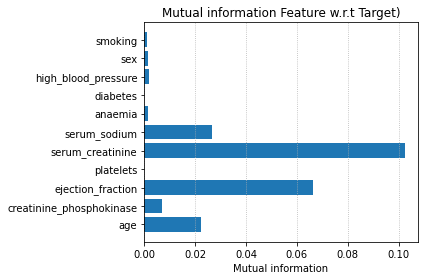

In [ ]:
mutual_information = (mutual_info_classif(X_train_holdout_st[features], y_train_holdout, 
                                    n_neighbors=20,
                                    discrete_features=[False, False, False, False, False, False, True, True, True, True, True],
                                    random_state=42))

plt.figure(figsize=(6, 4))
plt.barh(y=features, width=mutual_information)
plt.title("Mutual information Feature w.r.t Target)");
plt.xlabel("Mutual information")
plt.gca().xaxis.grid(True, linestyle=':');
plt.tight_layout();
#plt.savefig("/content/drive/MyDrive/Colab Notebooks/ProgettoMML/images/mutual_inf_holdout.png")

The only continous feauture that could be avoided durign the analisys is *platelets*.

### For K-fold


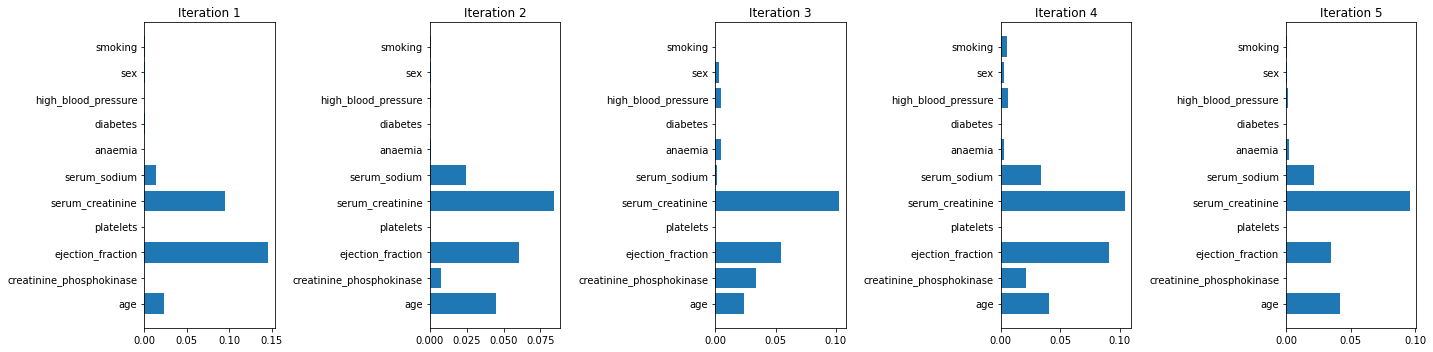

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

plt.figure(figsize=(20, 5))

for i, (train_index, val_index) in enumerate(skf.split(X_train, X_train["DEATH_EVENT"])):
    mutual_information =(mutual_info_classif(X_train.iloc[train_index][features],
                             X_train.iloc[train_index]["DEATH_EVENT"], n_neighbors=20,
                             discrete_features=[False, False, False, False, False, False, True, True, True, True, True],
                             random_state=42))
    plt.subplot(1, 5, i+1)
    plt.title(f"Iteration {i+1}")
    plt.barh(y=['age', 'creatinine_phosphokinase','ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'anaemia',
 'diabetes', 'high_blood_pressure', 'sex', 'smoking'], width=mutual_information, label="test statistic")
    
plt.tight_layout() 

#plt.savefig("/content/drive/MyDrive/Colab Notebooks/ProgettoMML/images/mutual_inf_kfold.png")

We have almost the same behavior of the holdout method so we keep all the features except *platelets*.

## Chi-Square Test

For the categorical features we also used a Chi-square Test. 
A chi-square test is used to test the independence of two events. In our scenario we want to determine the relationship between the independent category feature (predictor) and dependent category feature (response). In features selection, we aim to select the features which are highly dependent on the target.
The formula for Chi-Square is:

$$ \chi^2_c = \sum_{}^{}\frac{(O_i - E_i)^2}{E_i} $$

where $c$ are the degrees of freedom of the distribution, $O_i$ are the observed values and $E_i$ are the expected values.

When two features are independent, the observed value is close to the expected value, thus we will have smaller Chi-square value. So high Chi-Square values indicates that the hypothesis of independence is incorrect. In other words, the higher the Chi-Square value, the more dependent the feature is on the response variable, and it can be selected for model training.

To perform a Chi-Square Test, we have different steps:

1. Define Hypothesis: 
  
  **Null Hypothesis** ($H_0$) -> Two features are independent 
  
  **Alternate Hypothesis** ($H_1$) -> Two features are not independent

2. Build a contingency table: it is a table showing the distribution of one variable in rows and another in columns in order to study the two features. The degree of freedom of the contingency table is given as $(r-1)*(c-1)$ where $r$ are the rows and $c$ are the columns.  

3. Find the expected values 

4. Calculate the Chi-Square statistic: it consist of summarizing the observed values and the expected values(calculated in step 3) into a table and determine the Chi-Square value.

5. Accept or Reject the Null Hypothesis: considering a 95% confidence that is $alpha = 0.05$ we can check if the Chi-Square value falls in the acceptance or rejection region. If the Chi-Square value is less than the critical Chi-Square value we accept the null hypothesis.




In [ ]:
def chisquare_test(df, feat1, feat2):
    prob = 0.95
    contingency_table = pd.crosstab(df[feat1], df[feat2])
    stat, p, dof, expected = chi2_contingency(contingency_table)
    critical = chi2.ppf(prob, dof)
    alpha = 1.0 - prob
    return stat, p

### For holdout

In [ ]:
stats = []
p_values = []
for cat in categorical:
    stat, p = chisquare_test(X_train_holdout_st, cat, "DEATH_EVENT")
    stats.append(stat)
    p_values.append(p)        

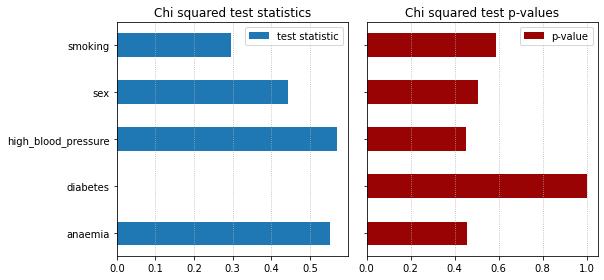

In [ ]:
fig, axes = plt.subplots(ncols=2, sharey=True)
fig.set_size_inches(8.5, 4)
axes[0].barh(y=categorical, width=stats, label="test statistic", height=0.5)
axes[0].set_title("Chi squared test statistics")
axes[1].barh(y=categorical, width=p_values, color="#990303", label="p-value", height=0.5)
axes[1].set_title("Chi squared test p-values")
axes[0].xaxis.grid(True, linestyle=':');
axes[1].xaxis.grid(True, linestyle=':');
axes[0].legend(loc=1)
axes[1].legend(loc=1)

fig.subplots_adjust(wspace=0.06)
plt.tight_layout()

In [ ]:
features_whole_dataset = ['anaemia', 'high_blood_pressure', 'age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']

We drop the features the features *smoking, sex,* and *diabetes* and we leave *high_blood_pressure* and *anaemia*. 

### For K-fold

Here we show the Chi-Square test for each iteration of the cross validation:

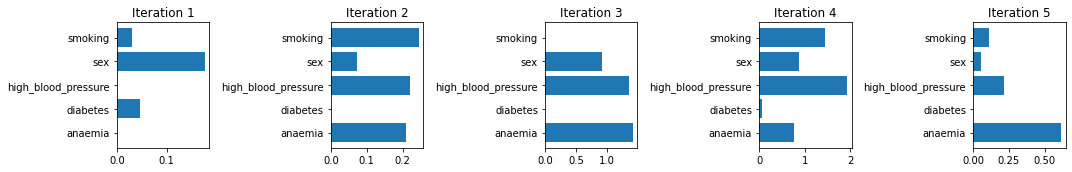

In [ ]:
plt.figure(figsize=(15, 2.5))
for i, (train_index, val_index) in enumerate(skf.split(X_train, X_train["DEATH_EVENT"])):
    stats = []
    p_values = []
    for feat in categorical:
        stat, p = chisquare_test(X_train.iloc[train_index], feat, "DEATH_EVENT")
        stats.append(stat)
        p_values.append(p)
    plt.subplot(1, 5, i+1)
    plt.title(f"Iteration {i+1}")
    plt.barh(y=['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'], width=stats, label="test statistic")
plt.tight_layout()

In [ ]:
kfold_features = [['diabetes', 'sex', 'age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium'],
                  ['high_blood_pressure', 'smoking', 'age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium'],
                  ['anaemia', 'high_blood_pressure', 'age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium'],
                  ['high_blood_pressure', 'smoking', 'age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium'],
                  ['anaemia', 'high_blood_pressure', 'age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']]

We have a different situation here w.r.t the holdout for this reason we decided to include in our analisys the top 2 features for each iteration. 

# Metrics used

After all the preliminary phases addressed in the previous sections, now we are ready to perform the classification task. In the following many different classifiers are compared in order to find the one that best suits our analysis. The goodness of each model is evaluated through different metrics that are used to compare the algorithms and make choices during the hyperparameter tuning phase.

## Accuracy 
It is defined as the number of correct predictions divided by the total number of predictions:

${accuracy = \frac {TP+TN}{TP+TN+FP+FN}\quad }$

## Precision

It is defined as the number of true predicted positives over the total number of positives(is the fraction of relevant instances among the retrieved instances):

${precision = \frac {TP}{TP+FP}\quad}$


## Recall
It is defined as the number of true predicted positives over the total number of positives(is the fraction of relevant instances that were retrieved):

${recall = \frac {TP}{TP+FN}\quad}$ 

## F1 score
It is the harmonic mean between precision and recall. Its range is [0,1] and its value indicates how precise and robust the classifier is. 

Formally, it can be espressed as: 

${F_1 = 2 \times \frac{precision \times recall}{precision+recall}}$


In [ ]:
def compute_metrics(labels, predictions):
  
  accuracy = accuracy_score(labels, predictions)
  recall = recall_score(labels, predictions)
  precision = precision_score(labels, predictions)
  f1 = f1_score(labels, predictions)

  return accuracy, recall, precision, f1

# Summary of the Pipeline

## Pipeline Holdout
![pipeline holdout](https://github.com/salvatorecurello/Heart-Failure-Data-Analysis/blob/main/schema%20holdout.jpg?raw=true)



The scheeme above show the entire pipeline applied for the Holdout technique. After the  data preparation step (missing values checks, outliers detection, etc.) we perform a train/test split. The training set will be used to predict the labels of the test set in order to evaluate the model. 

The path on the left shows the whole training phase while the one on the right shows  the test phase. First, we apply a data standardization process in which we compute the mean and std on the training set to be used for scaling (fit) both the training and test set (transform). We do so beacuse it is not correct to perform standardization before splitting the data. In general, we should not fit a preprocessing algorithm on the whole dataset, but only on the training set, and use the fitted algorithm to transform the test set. The reason is that the test set is used to get an estimate of the performance of the model on unseen data. So we should behave as if we do not have access to the test set while training the algorithm, and this is also valid for cross validation as we will see later. If we fit the standard scaler on the whole dataset, information from the test set is used to normalize the training set. This is a common case of "data leakage", which means that information from the test set is used while training the model. This often results in overestimating the model's performance. In case our classifier will be a "Decision Tree" or a "Random Forest" this step can be skipped.

Then, we apply a feature selection step in which we compute and store the features to be kept(considering only the training set for the same reasons previously explained) and removing the non relevant ones from both train and test set. 

Afterwards, we tried to consider the unbalance of the dataset. Basically, we operated in two ways: not to handle the unbalance(no oversampling technique is applied),  performing oversampling (Random oversampling, SMOTE, SMOTE-NC). Also in this case, the process is done only in the training set since the test set must reflect the reality and should not contain examples that may be present also in the training set.

Finally, a classifier is fitted on the resulting training examples(and labels) in order to get a predictive model which will be used to make predictions, and so to get labels, on the test set. These predictions will be used to evaluate the performance of our model. 

## Pipeline K-fold

![pipeline kfold](https://github.com/salvatorecurello/Heart-Failure-Data-Analysis/blob/main/schema%20kfold.jpg?raw=true)


The scheeme above represent the pipeline applied in the case of 5-fold CV. The situation is similar because all the steps done once on the Holdout pipeline will be repeated for each iteration. At the end, we will obtain five values corresponding the accuracy of each split, and by computing the mean of all of them we will obtain the evaluation of the model. 
It is essential that all the "preprocessing" steps such as Data standardization, feature selection and oversampling must be done separately for each split. If, for example, we apply feature selection on the whole dataset before cross validation, this will lead to overfitting, since we will select them based on how they perform on the whole data. Same is valid for standardization and oversampling.

In [ ]:
def KFOLD_predictions(model, X, y, resampling_method, features_kfold, model_type=None):
  
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scaler = StandardScaler()
    
    accuracy = 0
    recall = 0
    precision = 0
    f1 = 0

    for i, (train_idx, val_idx) in enumerate(skf.split(X, y)):

      X_fold = X[features_kfold[i]]

      X_train_kfold, X_val_kfold = X_fold.iloc[train_idx], X_fold.iloc[val_idx]
      y_train_kfold, y_val_kfold = y.iloc[train_idx], y.iloc[val_idx]

      if model_type == 'logistic' or model_type == 'svm':
        
        df_to_standardize_train = X_train_kfold[features_kfold[i][2:]]
        df_to_standardize_test = X_val_kfold[features_kfold[i][2:]]
      
        scaler.fit(df_to_standardize_train)
        X_train_st = pd.DataFrame(scaler.transform(df_to_standardize_train), columns = df_to_standardize_train.columns)
        X_val_st = pd.DataFrame(scaler.transform(df_to_standardize_test), columns = df_to_standardize_test.columns)

        X_train_kfold.reset_index(drop=True, inplace=True)
        X_val_kfold.reset_index(drop= True, inplace=True)

        X_train_kfold = pd.concat([X_train_kfold[features_kfold[i][:2]], X_train_st], axis=1)
        X_val_kfold = pd.concat([X_val_kfold[features_kfold[i][:2]], X_val_st], axis=1)

      if resampling_method != 'no': 
        X_train_kfold, y_train_kfold = make_oversampling(X_train_kfold, y_train_kfold, resampling_method)
      
      model.fit(X_train_kfold, y_train_kfold)
      predictions = model.predict(X_val_kfold)

      accuracy = accuracy + accuracy_score(y_val_kfold, predictions)
      precision = precision + precision_score(y_val_kfold, predictions)
      recall = recall + recall_score(y_val_kfold, predictions)
      f1 = f1 + f1_score(y_val_kfold, predictions)
    
    final_accuracy = accuracy/5
    final_precision = precision/5
    final_recall = recall/5
    final_f1 = f1/5

    return final_accuracy, final_precision, final_recall, final_f1

# Models

Finally, we introduce the models that have been tested:
- Decision Tree
- Random Forest
- Logistic Regression
- Support Vector Machine (linear)
- Support Vector Machine (rbf)

Each model will be test according different hyperparameters and for each oversampling technique previosly introduced.

# Decision Tree

Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. Basically, a process of dividing up the input space is applied. A greedy approach is used to divide the space and it is called recursive binary splitting.

This is a numerical procedure where all the values are lined up and different split points are tried and tested using a cost function. The split with the best cost (lowest cost because we minimize cost) is selected.

All input variables and all possible split points are evaluated and chosen in a greedy manner.

The measure that we used to do this is the **Gini Index** which can be formalized as follow:


${G = \sum_{k} p_k (1- p_k)}$  

where $p_k$ is the ratio between number of samples of class $k$ and total number of samples(the proportion of training instances with class k). Gini index also tells about the purity of node selection. If a node selected is very pure the value of Gini index will be less.

The higher is the number of features the higher is the number of splits and this could produce a huge tree. Such trees are complex and can lead to overfitting. So, we need to know when to stop. One way of doing this is to set a minimum number of training inputs to use on each leaf. For example, we could set a maximum depth of our model. 

Maximum depth refers to the the length of the longest path from a root to a leaf. In our case we tested different value of *max_depth*:$[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]$.

In [ ]:
depth = [1,2,3,4,5,6,7,8,9,10,11,12]

df_dt = pd.DataFrame(columns=['Model', 'Kfold', 'Oversampling Method', 'Max_depth', 'Accuracy','Recall', 'Precision', 'f1'])

for d in depth:
    # no oversampling 
    clf_dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=d, random_state=42)
    clf_dt.fit(X_train_holdout[features_whole_dataset], y_train_holdout)
    predictions = clf_dt.predict(X_test_holdout[features_whole_dataset])
    
    accuracy, recall, precision, f1 = compute_metrics(X_test["DEATH_EVENT"], predictions)

    dict_result = {'Model': 'DecisionTree', 'Kfold': 'NO', 'Oversampling Method': 'None', 'Max_depth': d, 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
    df_dt = df_dt.append(dict_result, ignore_index = True)

    # random oversampling
    clf_dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=d, random_state=42)
    X_train_oversampled, y_train_oversampled = make_oversampling(X_train_holdout[features_whole_dataset], y_train_holdout, 'oversampling')

    clf_dt.fit(X_train_oversampled, y_train_oversampled)
    predictions = clf_dt.predict(X_test[features_whole_dataset])
    
    accuracy, recall, precision, f1 = compute_metrics(X_test["DEATH_EVENT"], predictions)

    dict_result = {'Model': 'DecisionTree', 'Kfold': 'NO', 'Oversampling Method': 'oversampling', 'Max_depth': d, 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
    df_dt = df_dt.append(dict_result, ignore_index = True)
    
    # smote
    clf_dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=d, random_state=42)
    X_train_oversampled, y_train_oversampled = make_oversampling(X_train_holdout[features_whole_dataset], y_train_holdout, 'smote')

    clf_dt.fit(X_train_oversampled, y_train_oversampled)
    predictions = clf_dt.predict(X_test[features_whole_dataset])
    
    accuracy, recall, precision, f1 = compute_metrics(X_test["DEATH_EVENT"], predictions)

    dict_result = {'Model': 'DecisionTree', 'Kfold': 'NO', 'Oversampling Method': 'smote', 'Max_depth': d, 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
    df_dt = df_dt.append(dict_result, ignore_index = True)

    # smotenc
    clf_dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=d, random_state=42)
    X_train_oversampled, y_train_oversampled = make_oversampling(X_train_holdout[features_whole_dataset], y_train_holdout, 'smoteNC')

    clf_dt.fit(X_train_oversampled, y_train_oversampled)
    predictions = clf_dt.predict(X_test[features_whole_dataset])
    
    accuracy, recall, precision, f1 = compute_metrics(X_test["DEATH_EVENT"], predictions)

    dict_result = {'Model': 'DecisionTree', 'Kfold': 'NO', 'Oversampling Method': 'smoteNC', 'Max_depth': d, 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
    df_dt = df_dt.append(dict_result, ignore_index = True)


After 48 different configuration of Decision Tree with Holdout we obtain that the best configuration is:

In [ ]:
idx_best_accuracy = df_dt['Accuracy'].idxmax()
df_max = df_dt.loc[[idx_best_accuracy]]
df_max

,Model,Kfold,Oversampling Method,Max_depth,Accuracy,Recall,Precision,f1
10,DecisionTree,NO,smote,3,0.75,0.64,0.727273,0.680851


In [ ]:
df_dt_none = df_dt[df_dt['Oversampling Method'] == 'None']
df_dt_over = df_dt[df_dt['Oversampling Method'] == 'oversampling']
df_dt_smote = df_dt[df_dt['Oversampling Method'] == 'smote']
df_dt_smotenc = df_dt[df_dt['Oversampling Method'] == 'smoteNC']

Here, we plot the different results according different values of *max_depth* for each oversampling technique applied with the Holdout method:

In [ ]:
def plot_figure(i, depth, none, over, smote, smotenc, measure):
  plt.subplot(2, 2, i)    
  plt.plot(list(depth), none, label="None", marker='o', linewidth=2, markersize=4)
  plt.plot(list(depth), over, label="Random oversampling", marker='o', linewidth=2, markersize=4)
  plt.plot(list(depth), smote, label = "SMOTE", marker='o', linewidth=2, markersize=4)
  plt.plot(list(depth), smotenc, label = "SMOTE-NC", marker='o', linewidth=2, markersize=4)

  plt.legend(loc=4)
  plt.grid(True)
  plt.ylim(0, 1)
  plt.ylabel("Validation "+ measure)
  plt.xlabel("Tree depth")
  plt.title(measure)


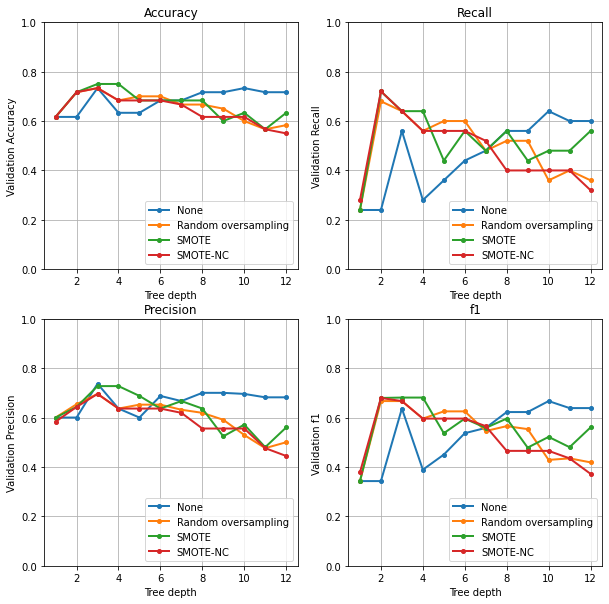

In [ ]:
plt.figure(figsize=(10, 10))

plot_figure(1, depth, df_dt_none["Accuracy"], df_dt_over["Accuracy"], df_dt_smote["Accuracy"], df_dt_smotenc["Accuracy"], "Accuracy")
plot_figure(2, depth, df_dt_none["Recall"], df_dt_over["Recall"], df_dt_smote["Recall"], df_dt_smotenc["Recall"], "Recall")
plot_figure(3, depth, df_dt_none["Precision"], df_dt_over["Precision"], df_dt_smote["Precision"], df_dt_smotenc["Precision"], "Precision")
plot_figure(4, depth, df_dt_none["f1"], df_dt_over["f1"], df_dt_smote["f1"], df_dt_smotenc["f1"], "f1")

In [ ]:
#KFOLD

for d in depth:
    # no oversampling 
    clf_dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=d, random_state=42)
    
    accuracy, recall, precision, f1 = KFOLD_predictions(clf_dt, X_train, X_train["DEATH_EVENT"], 'no', kfold_features) #  X_train, X_train["DEATH_EVENT"],
    
    dict_result = {'Model': 'DecisionTree', 'Kfold': 'YES', 'Oversampling Method': 'None', 'Max_depth': d, 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
    df_dt = df_dt.append(dict_result, ignore_index = True)

    # random oversampling
    clf_dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=d, random_state=42)
    
    accuracy, recall, precision, f1 = KFOLD_predictions(clf_dt,  X_train, X_train["DEATH_EVENT"], 'oversampling', kfold_features) #X_train, X_train["DEATH_EVENT"]

    dict_result = {'Model': 'DecisionTree', 'Kfold': 'YES', 'Oversampling Method': 'oversampling', 'Max_depth': d, 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
    df_dt = df_dt.append(dict_result, ignore_index = True)

    # smote
    clf_dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=d, random_state=42)
    
    accuracy, recall, precision, f1 = KFOLD_predictions(clf_dt,  X_train, X_train["DEATH_EVENT"], 'smote', kfold_features)

    dict_result = {'Model': 'DecisionTree', 'Kfold': 'YES', 'Oversampling Method': 'smote', 'Max_depth': d, 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
    df_dt = df_dt.append(dict_result, ignore_index = True)

    # smotenc
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=d, random_state=42)
    
    accuracy, recall, precision, f1 = KFOLD_predictions(clf_dt,  X_train, X_train["DEATH_EVENT"], 'smoteNC', kfold_features)

    dict_result = {'Model': 'DecisionTree', 'Kfold': 'YES', 'Oversampling Method': 'smoteNC', 'Max_depth': d, 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
    df_dt = df_dt.append(dict_result, ignore_index = True)

# clf_dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, random_state=42)
# clf_dt.fit(X_train, y_train)

The best configuration for Decision Tree with K-fold is:

In [ ]:
idx_best_accuracy = df_dt['Accuracy'].idxmax()
df_max = df_dt.loc[[idx_best_accuracy]]
df_max

,Model,Kfold,Oversampling Method,Max_depth,Accuracy,Recall,Precision,f1
57,DecisionTree,YES,oversampling,3,0.790957,0.620623,0.772381,0.684588


In [ ]:
df_dt_kfold = df_dt[df_dt['Kfold'] == 'YES']
df_dt_none_kfold = df_dt_kfold[df_dt_kfold['Oversampling Method'] == 'None']
df_dt_over_kfold = df_dt_kfold[df_dt_kfold['Oversampling Method'] == 'oversampling']
df_dt_smote_kfold = df_dt_kfold[df_dt_kfold['Oversampling Method'] == 'smote']
df_dt_smotenc_kfold = df_dt_kfold[df_dt_kfold['Oversampling Method'] == 'smoteNC']

Here, we plot the different results according different values of *max_depth* for each oversampling technique applied with the K-fold method:

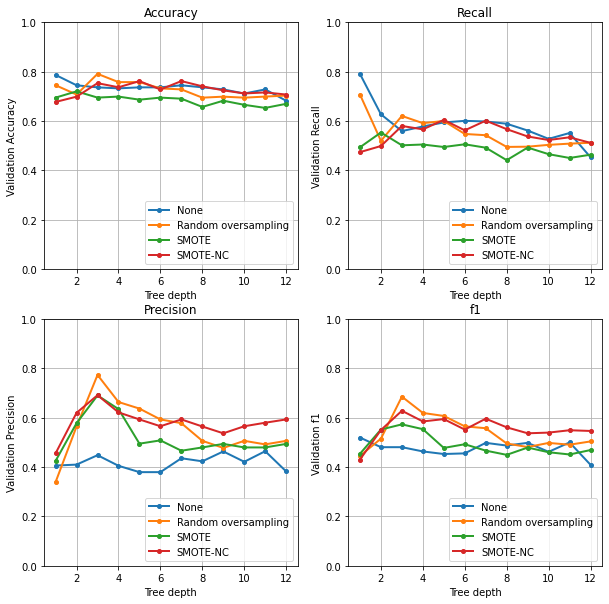

In [ ]:
plt.figure(figsize=(10, 10))

plot_figure(1, depth, df_dt_none_kfold["Accuracy"], df_dt_over_kfold["Accuracy"], df_dt_smote_kfold["Accuracy"], df_dt_smotenc_kfold["Accuracy"], "Accuracy")
plot_figure(2, depth, df_dt_none_kfold["Recall"], df_dt_over_kfold["Recall"], df_dt_smote_kfold["Recall"], df_dt_smotenc_kfold["Recall"], "Recall")
plot_figure(3, depth, df_dt_none_kfold["Precision"], df_dt_over_kfold["Precision"], df_dt_smote_kfold["Precision"], df_dt_smotenc_kfold["Precision"], "Precision")
plot_figure(4, depth, df_dt_none_kfold["f1"], df_dt_over_kfold["f1"], df_dt_smote_kfold["f1"], df_dt_smotenc_kfold["f1"], "f1")

In [ ]:
'''

fold=0

voted_feat=[]

for train_idx, test_idx in skf.split(traindf):
      X_train = traindf.iloc[train_idx].loc[:, features]
      X_val = traindf.iloc[test_idx][features]
      y_train = traindf.iloc[train_idx].loc[:,'DEATH_EVENT']
      y_val = traindf.loc[test_idx]['DEATH_EVENT']
      

      mi = SelectKBest(mutual_info_classif, k=7)
      mi.fit(X_train, y_train)
      cols = mi.get_support(indices=True)
              
      x_traincross_mi_new = X_train.iloc[:,cols]
      x_valcross_mi_new = X_val.iloc[:,cols]
      x_testcross_mi_new = x_testsd_df.iloc[:,cols]

      sele_col=x_testcross_mi_new.columns.tolist()
      
      nu_aftermi=[]
      ca_aftermi=[]
      for selc in sele_col: 
        for cat in categorical:
          if (selc==cat):
            ca_aftermi.append(selc)
      for seln in sele_col: 
        for num in numerical:
          if (seln==num):
            nu_aftermi.append(seln)

      x_traincross_mi_new_cat = x_traincross_mi_new.loc[:,ca_aftermi]
      x_valcross_mi_new_cat = x_valcross_mi_new.loc[:,ca_aftermi]
      x_testcross_mi_new_cat = x_testcross_mi_new.loc[:,ca_aftermi]
      x_traincross_mi_new_num = x_traincross_mi_new.loc[:,nu_aftermi]
      x_valcross_mi_new_num = x_valcross_mi_new.loc[:,nu_aftermi]
      x_testcross_mi_new_num = x_testcross_mi_new.loc[:,nu_aftermi]

      if (len(x_traincross_mi_new_cat.columns)!=0):
        chi = SelectKBest(chi2, k=1)
        chi.fit(x_traincross_mi_new_cat,y_train)
        cols = chi.get_support(indices=True)
        selected_catcolumns = x_traincross_mi_new_cat.iloc[:,cols].columns.tolist()
        selected_columns= nu_aftermi + selected_catcolumns

      selected_columns= sele_col
      
      #plot_selFeat(selected_columns, features)
      
      voted_feat= voted_feat + selected_columns
          
      fold=fold+1

def mostFrequentfeat(arr, n, k): 
    sel_feat=[]
    um = {} 
    for i in range(n): 
        if arr[i] in um: 
            um[arr[i]] += 1
        else: 
            um[arr[i]] = 1
    a = [0] * (len(um)) 
    j = 0
    for i in um: 
        a[j] = [i, um[i]] 
        j += 1
    a = sorted(a, key = lambda x : x[0], 
                         reverse = True) 
    a = sorted(a, key = lambda x : x[1],  
                         reverse = True) 
                           
    # display the top k numbers  
    
    for i in range(k): 
        #print(a[i][0], end = " ")
        sel_feat.append(a[i][0])
    
    
    return sel_feat

# the folds differs only for the two categorical features that does not influence too much 
# these features have been added just to see how the model can handle different data types

features_kfold = ['high_blood_pressure', 'smoking', 'age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']
'''

## Holdout vs K-fold

The following picture shows the overlapped results for both Holdout and K-fold method in term of accuracy:

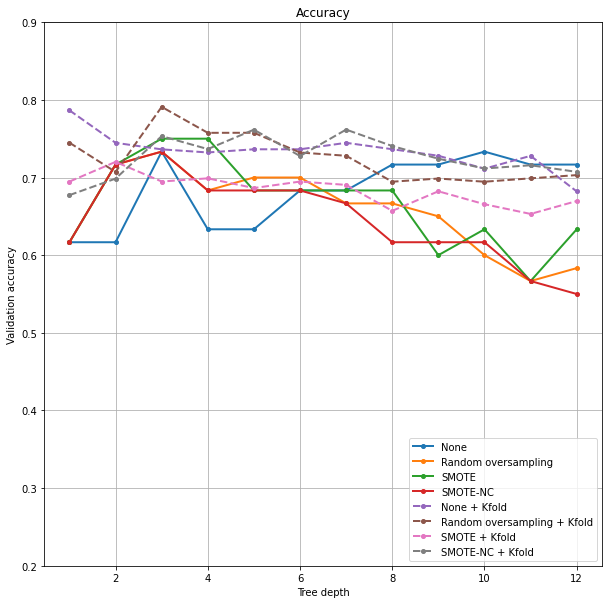

In [ ]:
plt.figure(figsize=(10, 10))

plt.plot(list(depth), df_dt_none["Accuracy"], label="None", marker='o', linewidth=2, markersize=4)
plt.plot(list(depth), df_dt_over["Accuracy"], label="Random oversampling", marker='o', linewidth=2, markersize=4)
plt.plot(list(depth), df_dt_smote["Accuracy"], label = "SMOTE", marker='o', linewidth=2, markersize=4)
plt.plot(list(depth), df_dt_smotenc["Accuracy"], label = "SMOTE-NC", marker='o', linewidth=2, markersize=4)

plt.plot(list(depth), df_dt_none_kfold["Accuracy"], label="None + Kfold", linestyle='dashed',marker='o', linewidth=2, markersize=4)
plt.plot(list(depth), df_dt_over_kfold["Accuracy"], label="Random oversampling + Kfold", linestyle='dashed',marker='o', linewidth=2, markersize=4)
plt.plot(list(depth), df_dt_smote_kfold["Accuracy"], label = "SMOTE + Kfold", linestyle='dashed', marker='o', linewidth=2, markersize=4)
plt.plot(list(depth), df_dt_smotenc_kfold["Accuracy"], label = "SMOTE-NC + Kfold", linestyle='dashed', marker='o', linewidth=2, markersize=4)

plt.legend(loc=4)
plt.grid(True)
plt.ylim(0.2, 0.9)
plt.ylabel("Validation accuracy")
plt.xlabel("Tree depth")
plt.title("Accuracy")
plt.savefig("accuracy_dec_tree.png")

The dashed lines refer to the K-fold method. We can easily see how the application of K-fold bring better performance and, as expected, the use of SMOTE-NC+Kfold perform better than SMOTE+Kfold beacuse SMOTE-NC take into account also the categorical features.

In [ ]:
def make_pred(model, X_test, y_test):
  pred=model.predict(X_test)
  acc_on_Test= accuracy_score(y_test,pred)
  precision_on_Test = precision_score(y_test, pred)
  recall_on_Test=recall_score(y_test, pred)
  f1_on_Test=f1_score(y_test, pred)

In [ ]:
# clf_dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, random_state=42)
# clf_dt.fit(X_train[features_k_fold], y_train)
# acc, p, r, f1 =make_pred(best_model, X_test[features_kfold], y_test)

# Random Forest

Random Forest is an esemble of decision trees. Basically, we build a number of decision trees on bootstrapped training sample. But when building these decision trees, each time a split in a tree is performed, a random sample of $m$ predictors is chosen as split candidates from the full set of $p$ predictors. The split is allowed to use only one of those $m$ predictors. Typically, we choose $m \approx \sqrt{p}$ which means, the number of predictors considered at each split is approximately equal to the square root of the total number of predictors.
In this way, at each split in the tree the algorithm is not even allowed to consider a majority of the available predictors. The reason is that if there is one very strong predictor in the dataset, along with a number of other moderately strong predictors, most of all the trees will use this predictor in the top split. Consequently, all of the trees will look similar to each other and the predictions will be higly correlated.

The algorithm is characterized by many hyperparameters, including the number of trees and the maximum depth of every tree. In the inference stage it uses a majority vote over all trees to obtain the prediction.

Basically, the following steps are executed:
- Create a bootstrapped dataset which means randomly select entries for the original dataset, given the assumption that we can select the same element more than once
- Create a decision tree using the bootstrapped dataset, but only using a random subset of variables
- Repeat the previous two operations for several decision trees
- Then run the data to be predicted through each decision tree
- And see which of the options receives the more votes

The adavantages of using Random Forest are:
- reducing overfitting in decision trees which bring an higher accuracy
- suitable for both classification and regression problems
- works well with both categorical and continuous values
- normalization techniques are not required since it uses a rule-based approach.
- we can visualize the features importance

However, despite these advantages, a random forest algorithm also has some drawbacks.
- It requires much computational power as well as resources as it builds numerous trees to combine their outputs. 
- It also requires much time for training as it combines a lot of decision trees to determine the class.
- Due to the ensemble of decision trees, it also suffers interpretability and fails to determine the significance of each variable.

We applied Random Forest considering the following hyperparameters:
- *max_depth* = $[1,2,3,4,5,6,7,8,9,10,11,12]$
- *n_estimators* = $[5,10,20,50,100]$

In [ ]:
depth = [1,2,3,4,5,6,7,8,9,10,11,12]
number_trees = [5,10,20,50,100]

df_rf = pd.DataFrame(columns=['Model', 'Kfold', 'Oversampling Method', 'Max_depth', 'N_estimators', 'Accuracy','Recall', 'Precision', 'f1'])
df_rf

for n in number_trees:
  for d in depth:
      # no oversampling 
      clf_rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=42)
        
      clf_rf.fit(X_train_holdout[features_whole_dataset], y_train_holdout)
      predictions = clf_rf.predict(X_test[features_whole_dataset])
      
      accuracy, recall, precision, f1 = compute_metrics(X_test["DEATH_EVENT"], predictions)

      dict_result = {'Model': 'RandomForest', 'Kfold': 'NO', 'Oversampling Method': 'None', 'Max_depth': d, 'N_estimators': n, 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
      df_rf = df_rf.append(dict_result, ignore_index = True)

      # random oversampling
      clf_rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=42)
      X_train_oversampled, y_train_oversampled = make_oversampling(X_train_holdout[features_whole_dataset], y_train_holdout, 'oversampling')

      clf_rf.fit(X_train_oversampled, y_train_oversampled)
      predictions = clf_rf.predict(X_test[features_whole_dataset])
      
      accuracy, recall, precision, f1 = compute_metrics(X_test["DEATH_EVENT"], predictions)

      dict_result = {'Model': 'RandomForest', 'Kfold': 'NO', 'Oversampling Method': 'oversampling', 'Max_depth': d, 'N_estimators': n, 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
      df_rf = df_rf.append(dict_result, ignore_index = True)

      # smote
      clf_rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=42)
      X_train_oversampled, y_train_oversampled = make_oversampling(X_train_holdout[features_whole_dataset], y_train_holdout, 'smote')

      clf_rf.fit(X_train_oversampled, y_train_oversampled)
      predictions = clf_rf.predict(X_test[features_whole_dataset])
      
      accuracy, recall, precision, f1 = compute_metrics(X_test["DEATH_EVENT"], predictions)

      dict_result = {'Model': 'RandomForest', 'Kfold': 'NO', 'Oversampling Method': 'smote', 'Max_depth': d, 'N_estimators': n, 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
      df_rf = df_rf.append(dict_result, ignore_index = True)

      # smotenc
      clf_rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=42)
      X_train_oversampled, y_train_oversampled = make_oversampling(X_train_holdout[features_whole_dataset], y_train_holdout, 'smoteNC')

      clf_rf.fit(X_train_oversampled, y_train_oversampled)
      predictions = clf_rf.predict(X_test[features_whole_dataset])
      
      accuracy, recall, precision, f1 = compute_metrics(X_test["DEATH_EVENT"], predictions)

      dict_result = {'Model': 'RandomForest', 'Kfold': 'NO', 'Oversampling Method': 'smoteNC', 'Max_depth': d, 'N_estimators': n, 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
      df_rf = df_rf.append(dict_result, ignore_index = True)


We performed 240 different configuration for Random Forest with Holdout method, the best one is:

In [ ]:
idx_best_accuracy = df_rf['Accuracy'].idxmax()
df_max = df_rf.loc[[idx_best_accuracy]]
df_max

,Model,Kfold,Oversampling Method,Max_depth,N_estimators,Accuracy,Recall,Precision,f1
67,RandomForest,NO,smoteNC,5,10,0.783333,0.76,0.730769,0.745098


In [ ]:
df_rf_none = df_rf[df_rf['Oversampling Method'] == 'None']
df_rf_over = df_rf[df_rf['Oversampling Method'] == 'oversampling']
df_rf_smote = df_rf[df_rf['Oversampling Method'] == 'smote']
df_rf_smotenc = df_rf[df_rf['Oversampling Method'] == 'smoteNC']

Here, we plot the different results according different values of *max_depth* and *n_estimators* for each oversampling technique applied with the Holdout method:

In [ ]:
%matplotlib notebook
plt.ioff()
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2);
%matplotlib inline 
plt.ion()

In [ ]:
fig.set_size_inches(10, 10);
def animate_func(i):
    
    if i==12: 
      x=0
    elif i==24: 
      x=1
    elif i==36: 
      x=2
    elif i==48: 
      x=3
    else: 
      x=4

    # accuracy
    ax1.clear();
    ax1.plot(list(depth), df_rf_none["Accuracy"][i-12:i].tolist(), label="None", linewidth=1.5, marker='o', markersize=3);
    ax1.plot(list(depth), df_rf_over["Accuracy"][i-12:i].tolist(), label="Random Oversampling", linewidth=1.5, marker='o', markersize=3);
    ax1.plot(list(depth), df_rf_smote["Accuracy"][i-12:i].tolist(), label = "SMOTE", linewidth=1.5, marker='o', markersize=3);
    ax1.plot(list(depth), df_rf_smotenc["Accuracy"][i-12:i].tolist(), label = "SMOTE-NC", linewidth=1.5, marker='o', markersize=3);

    ax1.legend(fontsize=10, loc=3);
    ax1.grid(True);
    ax1.set_ylim(0, 1);
    ax1.set_ylabel("Validation accuracy");
    ax1.set_xlabel("Single tree depth");
    ax1.set_title(f"Accuracy (n_trees: {number_trees[x]})");

    # precision
    ax2.clear();
    ax2.plot(list(depth), df_rf_none["Precision"][i-12:i].tolist(), label="None", marker='o', linewidth=1.5, markersize=3);
    ax2.plot(list(depth), df_rf_over["Precision"][i-12:i].tolist(), label="Random Oversampling", marker='o', linewidth=1.5, markersize=3);
    ax2.plot(list(depth), df_rf_smote["Precision"][i-12:i].tolist(), label = "SMOTE", marker='o', linewidth=1.5, markersize=3);
    ax2.plot(list(depth), df_rf_smotenc["Precision"][i-12:i].tolist(), label = "SMOTE-NC", marker='o', linewidth=1.5, markersize=3);

    ax2.legend(fontsize=10, loc=3);
    ax2.grid(True);
    ax2.set_ylim(0, 1);
    ax2.set_ylabel("Validation precision");
    ax2.set_xlabel("Single tree depth");
    ax2.set_title(f"Precision (n_trees: {number_trees[x]})");

    # recall
    ax3.clear();
    ax3.plot(list(depth), df_rf_none["Recall"][i-12:i].tolist(), label="None", marker='o', linewidth=1.5, markersize=3);
    ax3.plot(list(depth), df_rf_over["Recall"][i-12:i].tolist(), label="Random Oversampling", marker='o', linewidth=1.5, markersize=3);
    ax3.plot(list(depth), df_rf_smote["Recall"][i-12:i].tolist(), label = "SMOTE", marker='o', linewidth=1.5, markersize=3);
    ax3.plot(list(depth), df_rf_smotenc["Recall"][i-12:i].tolist(), label = "SMOTE-NC", marker='o', linewidth=1.5, markersize=3);

    ax3.legend(fontsize=10, loc=4);
    ax3.grid(True);
    ax3.set_ylim(0, 1);
    ax3.set_ylabel("Validation recall");
    ax3.set_xlabel("Single tree depth");
    ax3.set_title(f"Recall (n_trees: {number_trees[x]})");

    # f1 score
    ax4.clear();
    ax4.plot(list(depth), df_rf_none["f1"][i-12:i].tolist(), label="None", marker='o', linewidth=1.5, markersize=3);
    ax4.plot(list(depth), df_rf_over["f1"][i-12:i].tolist(), label="Random Oversampling", marker='o', linewidth=1.5, markersize=3);
    ax4.plot(list(depth), df_rf_smote["f1"][i-12:i].tolist(), label = "SMOTE", marker='o', linewidth=1.5, markersize=3);
    ax4.plot(list(depth), df_rf_smotenc["f1"][i-12:i].tolist(), label = "SMOTE-NC", marker='o', linewidth=1.5, markersize=3);

    ax4.legend(fontsize=10, loc=4);
    ax4.grid(True);
    ax4.set_ylim(0, 1);
    ax4.set_ylabel("Validation f1 score");
    ax4.set_xlabel("Single tree depth");
    ax4.set_title(f"F1 score (n_trees: {number_trees[x]})");
    
    fig.tight_layout()
    return [fig];

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = [12, 24, 36, 48, 60],
                               interval = 100,
                               );
HTML(anim.to_jshtml())

In [ ]:
#KFOLD

for n in number_trees:
  for d in depth:
      # no oversampling 
      clf_rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=42)
      
      accuracy, recall, precision, f1 = KFOLD_predictions(clf_rf, X_train, X_train["DEATH_EVENT"], 'no', kfold_features)
      
      dict_result = {'Model': 'RandomForest', 'Kfold': 'YES', 'Oversampling Method': 'None', 'Max_depth': d, 'N_estimators': n, 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
      df_rf = df_rf.append(dict_result, ignore_index = True)

      # random oversampling
      clf_rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=42)
      
      accuracy, recall, precision, f1 = KFOLD_predictions(clf_rf, X_train, X_train["DEATH_EVENT"], 'oversampling', kfold_features)
      
      dict_result = {'Model': 'RandomForest', 'Kfold': 'YES', 'Oversampling Method': 'oversampling', 'Max_depth': d, 'N_estimators': n, 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
      df_rf = df_rf.append(dict_result, ignore_index = True)

      # smote
      clf_rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=42)
      
      accuracy, recall, precision, f1 = KFOLD_predictions(clf_rf, X_train, X_train["DEATH_EVENT"], 'smote', kfold_features)
      
      dict_result = {'Model': 'RandomForest', 'Kfold': 'YES', 'Oversampling Method': 'smote', 'Max_depth': d, 'N_estimators': n, 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
      df_rf = df_rf.append(dict_result, ignore_index = True)

      # smotenc
      clf_rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=42)
      
      accuracy, recall, precision, f1 = KFOLD_predictions(clf_rf, X_train, X_train["DEATH_EVENT"], 'smoteNC', kfold_features)
      
      dict_result = {'Model': 'RandomForest', 'Kfold': 'YES', 'Oversampling Method': 'smoteNC', 'Max_depth': d, 'N_estimators': n, 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
      df_rf = df_rf.append(dict_result, ignore_index = True)



The best configuration of Random Forest with K-fold is:

In [ ]:
idx_best_accuracy = df_rf['Accuracy'].idxmax()
df_max = df_rf.loc[[idx_best_accuracy]]
df_max

,Model,Kfold,Oversampling Method,Max_depth,N_estimators,Accuracy,Recall,Precision,f1
265,RandomForest,YES,oversampling,7,5,0.803635,0.717094,0.593333,0.644025


In [ ]:
df_rf_kfold = df_rf[df_rf['Kfold'] == 'YES']
df_rf_none_kfold = df_rf_kfold[df_rf_kfold['Oversampling Method'] == 'None']
df_rf_over_kfold = df_rf_kfold[df_rf_kfold['Oversampling Method'] == 'oversampling']
df_rf_smote_kfold = df_rf_kfold[df_rf_kfold['Oversampling Method'] == 'smote']
df_rf_smotenc_kfold = df_rf_kfold[df_rf_kfold['Oversampling Method'] == 'smoteNC']

Here, we plot the different results according different values of *max_depth* and *n_estimators* for each oversampling technique applied with the K-fold method:

In [ ]:
fig.set_size_inches(10, 10);
def animate_func(i):
    
    if i==12: 
      x=0
    elif i==24: 
      x=1
    elif i==36: 
      x=2
    elif i==48: 
      x=3
    else: 
      x=4

    # accuracy
    ax1.clear();
    ax1.plot(list(depth), df_rf_none_kfold["Accuracy"][i-12:i].tolist(), label="None + Kfold", linewidth=1.5, marker='o', markersize=3);
    ax1.plot(list(depth), df_rf_over_kfold["Accuracy"][i-12:i].tolist(), label="Random Oversampling + Kfold", linewidth=1.5, marker='o', markersize=3);
    ax1.plot(list(depth), df_rf_smote_kfold["Accuracy"][i-12:i].tolist(), label = "SMOTE + Kfold", linewidth=1.5, marker='o', markersize=3);
    ax1.plot(list(depth), df_rf_smotenc_kfold["Accuracy"][i-12:i].tolist(), label = "SMOTE-NC + Kfold", linewidth=1.5, marker='o', markersize=3);

    ax1.legend(fontsize=10, loc=3);
    ax1.grid(True);
    ax1.set_ylim(0, 1);
    ax1.set_ylabel("Validation accuracy");
    ax1.set_xlabel("Single tree depth");
    ax1.set_title(f"Accuracy (n_trees: {number_trees[x]})"); #{n_trees[i]}

    # precision
    ax2.clear();
    ax2.plot(list(depth), df_rf_none_kfold["Precision"][i-12:i].tolist(), label="None + Kfold", marker='o', linewidth=1.5, markersize=3);
    ax2.plot(list(depth), df_rf_over_kfold["Precision"][i-12:i].tolist(), label="Random Oversampling + Kfold", marker='o', linewidth=1.5, markersize=3);
    ax2.plot(list(depth), df_rf_smote_kfold["Precision"][i-12:i].tolist(), label = "SMOTE + Kfold", marker='o', linewidth=1.5, markersize=3);
    ax2.plot(list(depth), df_rf_smotenc_kfold["Precision"][i-12:i].tolist(), label = "SMOTE-NC + Kfold", marker='o', linewidth=1.5, markersize=3);

    ax2.legend(fontsize=10, loc=3);
    ax2.grid(True);
    ax2.set_ylim(0, 1);
    ax2.set_ylabel("Validation precision");
    ax2.set_xlabel("Single tree depth");
    ax2.set_title(f"Precision (n_trees: {number_trees[x]})");

    # recall
    ax3.clear();
    ax3.plot(list(depth), df_rf_none_kfold["Recall"][i-12:i].tolist(), label="None + Kfold", marker='o', linewidth=1.5, markersize=3);
    ax3.plot(list(depth), df_rf_over_kfold["Recall"][i-12:i].tolist(), label="Random Oversampling + Kfold", marker='o', linewidth=1.5, markersize=3);
    ax3.plot(list(depth), df_rf_smote_kfold["Recall"][i-12:i].tolist(), label = "SMOTE + Kfold", marker='o', linewidth=1.5, markersize=3);
    ax3.plot(list(depth), df_rf_smotenc_kfold["Recall"][i-12:i].tolist(), label = "SMOTE-NC + Kfold", marker='o', linewidth=1.5, markersize=3);

    ax3.legend(fontsize=10, loc=4);
    ax3.grid(True);
    ax3.set_ylim(0, 1);
    ax3.set_ylabel("Validation recall");
    ax3.set_xlabel("Single tree depth");
    ax3.set_title(f"Recall (n_trees: {number_trees[x]})");

    # f1 score
    ax4.clear();
    ax4.plot(list(depth), df_rf_none_kfold["f1"][i-12:i].tolist(), label="None + Kfold", marker='o', linewidth=1.5, markersize=3);
    ax4.plot(list(depth), df_rf_over_kfold["f1"][i-12:i].tolist(), label="Random Oversampling + Kfold", marker='o', linewidth=1.5, markersize=3);
    ax4.plot(list(depth), df_rf_smote_kfold["f1"][i-12:i].tolist(), label = "SMOTE + Kfold", marker='o', linewidth=1.5, markersize=3);
    ax4.plot(list(depth), df_rf_smotenc_kfold["f1"][i-12:i].tolist(), label = "SMOTE-NC + Kfold", marker='o', linewidth=1.5, markersize=3);

    ax4.legend(fontsize=10, loc=4);
    ax4.grid(True);
    ax4.set_ylim(0, 1);
    ax4.set_ylabel("Validation f1 score");
    ax4.set_xlabel("Single tree depth");
    ax4.set_title(f"F1 score (n_trees: {number_trees[x]})");
    
    fig.tight_layout()
    return [fig];

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = [12, 24, 36, 48, 60],
                               interval = 100,
                               );
HTML(anim.to_jshtml())

## Holdout vs K-fold

In [ ]:
%matplotlib notebook
plt.ioff()
fig, ((ax1)) = plt.subplots(1, 1);
%matplotlib inline 
plt.ion()

In [ ]:
fig.set_size_inches(8, 8);
def animate_func(i):
    
    if i==12: 
      x=0
    elif i==24: 
      x=1
    elif i==36: 
      x=2
    elif i==48: 
      x=3
    else: 
      x=4

    # accuracy
    ax1.clear();
    ax1.plot(list(depth), df_rf_none["Accuracy"][i-12:i].tolist(), label="None", linewidth=1.5, marker='o', markersize=3);
    ax1.plot(list(depth), df_rf_over["Accuracy"][i-12:i].tolist(), label="Random Oversampling", linewidth=1.5, marker='o', markersize=3);
    ax1.plot(list(depth), df_rf_smote["Accuracy"][i-12:i].tolist(), label = "SMOTE", linewidth=1.5, marker='o', markersize=3);
    ax1.plot(list(depth), df_rf_smotenc["Accuracy"][i-12:i].tolist(), label = "SMOTE-NC", linewidth=1.5, marker='o', markersize=3);

    ax1.plot(list(depth), df_rf_none_kfold["Accuracy"][i-12:i].tolist(), label="None + Kfold", linestyle='dashed', linewidth=1.5, marker='o', markersize=3);
    ax1.plot(list(depth), df_rf_over_kfold["Accuracy"][i-12:i].tolist(), label="Random Oversampling + Kfold", linestyle='dashed', linewidth=1.5, marker='o', markersize=3);
    ax1.plot(list(depth), df_rf_smote_kfold["Accuracy"][i-12:i].tolist(), label = "SMOTE + Kfold", linestyle='dashed', linewidth=1.5, marker='o', markersize=3);
    ax1.plot(list(depth), df_rf_smotenc_kfold["Accuracy"][i-12:i].tolist(), label = "SMOTE-NC + Kfold", linestyle='dashed', linewidth=1.5, marker='o', markersize=3);

    ax1.legend(fontsize=10, loc=3);
    ax1.grid(True);
    ax1.set_ylim(0.3, 1);
    ax1.set_ylabel("Accuracy");
    ax1.set_xlabel("Single tree depth");
    ax1.set_title(f"Accuracy (n_trees: {number_trees[x]})");

    fig.tight_layout()
    return [fig];



anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = [12, 24, 36, 48, 60],
                               interval = 100,
                               );
HTML(anim.to_jshtml())

# acc, p, r, f1 =make_pred(best_model_rf, X_test[features_k_fold], y_test)

As exepcted, the accuracy obtained with Random Forest is higher w.r.t. Decision Tree. Also here we have the same situation seen in Decision Tree in which the application of K-fold seems to be very useful. 

#Logistic Regression

The response of our dataset(*DEATH_EVENT*) falls into two category, 0 or 1. Logistic Regression models the probability that this response belongs to a particular category.
In our analysis, since our target variable is binary we will use *"Binomial Logistic regression"*.

We can define: 
$$ p(X) = P(Y = 1|X) $$

as the probability that $X$ belongs to class 1. 

In logistic regression, we use the *logistic function*:
$$ p(X) = \frac{e^{\beta_0 + \beta_1X}}{1+e^{\beta_0 + \beta_1X}} $$

After a bit of manipulation we can obtain:
$$ \frac{p(X)}{1-p(X)} = e^{\beta_0 + \beta_1X} $$

The quantity $\frac{p(X)}{1-p(X)}$ is called **odds** (and can take any values between 0 and infinite). 

By taking the logarithm of both sides, we have:
$$ \log(\frac{p(X)}{1-p(X)}) = \beta_0 + \beta_1X $$

where the left-hand side is called the **log-odds** or **logit**. 

In order to estimate parameters $β0$ and $β1$,  we use the maximum likelihood:

$$ l(\beta_0, \beta_1) = \prod_{i:y_i=1} p(x_i) \prod_{i:y_i=0}(1-p(x_i)) $$

which gives the probability of observed zeros and ones in data and parameters are chosen in order to maximize it.

In [ ]:
df_lr = pd.DataFrame(columns=['Model', 'Kfold', 'Oversampling Method', 'Solver', 'Accuracy','Recall', 'Precision', 'f1'])
df_lr

# no oversampling
clf_lr = LogisticRegression(random_state=42, solver='liblinear')

clf_lr.fit(X_train_holdout_st[features_whole_dataset], X_train_holdout_st["DEATH_EVENT"])
predictions = clf_lr.predict(X_test_holdout_st[features_whole_dataset])

accuracy, recall, precision, f1 = compute_metrics(X_test_holdout_st["DEATH_EVENT"], predictions)

dict_result = {'Model': 'LogisticRegression', 'Kfold': 'NO', 'Oversampling Method': 'None', 'Solver': 'liblinear', 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
df_lr = df_lr.append(dict_result, ignore_index = True)

# oversampling 
clf_lr = LogisticRegression(random_state=42, solver='liblinear')

X_train_oversampled, y_train_oversampled = make_oversampling(X_train_holdout_st[features_whole_dataset], X_train_holdout_st["DEATH_EVENT"], 'oversampling')

clf_lr.fit(X_train_oversampled, y_train_oversampled)
predictions = clf_lr.predict(X_test_holdout_st[features_whole_dataset])

accuracy, recall, precision, f1 = compute_metrics(X_test_holdout_st["DEATH_EVENT"], predictions)

dict_result = {'Model': 'LogisticRegression', 'Kfold': 'NO', 'Oversampling Method': 'oversampling', 'Solver': 'liblinear', 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
df_lr = df_lr.append(dict_result, ignore_index = True)

# smote 
clf_lr = LogisticRegression(random_state=42, solver='liblinear')

X_train_oversampled, y_train_oversampled = make_oversampling(X_train_holdout_st[features_whole_dataset], X_train_holdout_st["DEATH_EVENT"], 'smote')

clf_lr.fit(X_train_oversampled, y_train_oversampled)
predictions = clf_lr.predict(X_test_holdout_st[features_whole_dataset])

accuracy, recall, precision, f1 = compute_metrics(X_test_holdout_st["DEATH_EVENT"], predictions)

dict_result = {'Model': 'LogisticRegression', 'Kfold': 'NO', 'Oversampling Method': 'smote', 'Solver': 'liblinear', 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
df_lr = df_lr.append(dict_result, ignore_index = True)

# smoteNC
clf_lr = LogisticRegression(random_state=42, solver='liblinear')

X_train_oversampled, y_train_oversampled = make_oversampling(X_train_holdout_st[features_whole_dataset], X_train_holdout_st["DEATH_EVENT"], 'smoteNC')

clf_lr.fit(X_train_oversampled, y_train_oversampled)
predictions = clf_lr.predict(X_test_holdout_st[features_whole_dataset])

accuracy, recall, precision, f1 = compute_metrics(X_test_holdout_st["DEATH_EVENT"], predictions)

dict_result = {'Model': 'LogisticRegression', 'Kfold': 'NO', 'Oversampling Method': 'smoteNC', 'Solver': 'liblinear', 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
df_lr = df_lr.append(dict_result, ignore_index = True)

In [ ]:
#KFOLD


# no oversampling 
clf_lr = LogisticRegression(random_state=42, solver='liblinear')
    
accuracy, recall, precision, f1 = KFOLD_predictions(clf_lr, X_train, X_train["DEATH_EVENT"], 'no', kfold_features, 'logistic') 

dict_result = {'Model': 'LogisticRegression', 'Kfold': 'YES', 'Oversampling Method': 'None', 'Solver': 'liblinear', 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
df_lr = df_lr.append(dict_result, ignore_index = True)

# random oversampling

clf_lr = LogisticRegression(random_state=42, solver='liblinear')
    
accuracy, recall, precision, f1 = KFOLD_predictions(clf_lr, X_train, X_train["DEATH_EVENT"], 'oversampling', kfold_features, 'logistic')

dict_result = {'Model': 'LogisticRegression', 'Kfold': 'YES', 'Oversampling Method': 'oversampling', 'Solver': 'liblinear', 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
df_lr = df_lr.append(dict_result, ignore_index = True)

# smote
clf_lr = LogisticRegression(random_state=42, solver='liblinear')
    
accuracy, recall, precision, f1 = KFOLD_predictions(clf_lr, X_train, X_train["DEATH_EVENT"], 'smote', kfold_features, 'logistic') 

dict_result = {'Model': 'LogisticRegression', 'Kfold': 'YES', 'Oversampling Method': 'smote', 'Solver': 'liblinear', 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
df_lr = df_lr.append(dict_result, ignore_index = True)

# smotenc
clf_lr = LogisticRegression(random_state=42, solver='liblinear')
    
accuracy, recall, precision, f1 = KFOLD_predictions(clf_lr, X_train, X_train["DEATH_EVENT"], 'smoteNC', kfold_features, 'logistic')

dict_result = {'Model': 'LogisticRegression', 'Kfold': 'YES', 'Oversampling Method': 'smoteNC', 'Solver': 'liblinear', 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
df_lr = df_lr.append(dict_result, ignore_index = True)



The best configuration of Logistic Regression reach 0.782 accuracy K-fold and no oversampling technique applied. We report below some barplots that show the results:

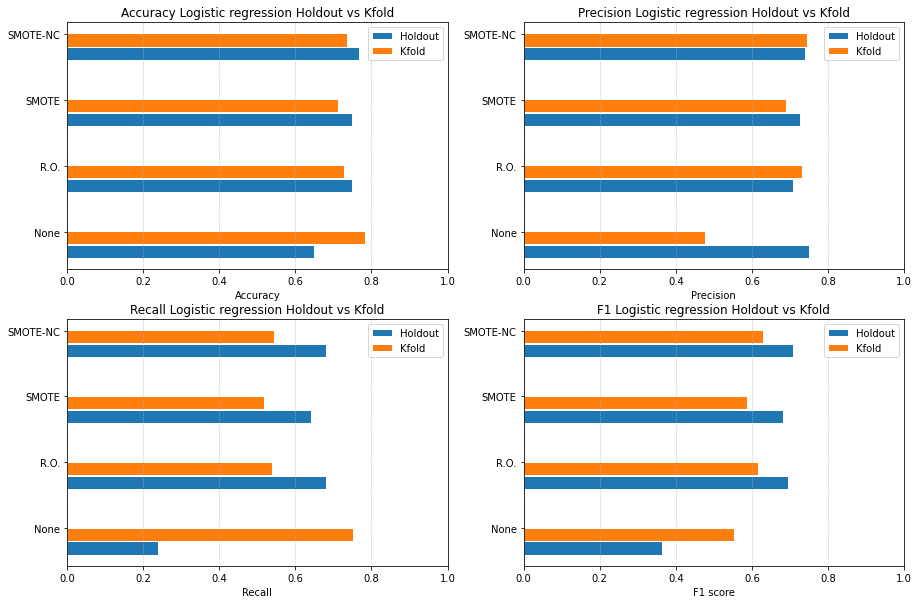

In [ ]:
fig = plt.figure(figsize=(15, 10))
barWidth = 0.2
space=0.01
 
bars1 = [df_lr["Accuracy"][0], df_lr["Accuracy"][1], df_lr["Accuracy"][2], df_lr["Accuracy"][3]]
bars2 = [df_lr["Accuracy"][4], df_lr["Accuracy"][5], df_lr["Accuracy"][6], df_lr["Accuracy"][7]]

r1 = np.arange(len(bars1))
r2 = [x + barWidth + space for x in r1]

plt.subplot(2, 2, 1) 
plt.barh(r1, bars1, label="Holdout",height=barWidth, edgecolor='white', )
plt.barh(r2, bars2, label="Kfold", height=barWidth, edgecolor='white',)


plt.title("Accuracy Logistic regression Holdout vs Kfold")
plt.yticks([r + barWidth*1.5 for r in range(len(bars1))], ["None", "R.O.", "SMOTE", "SMOTE-NC", ])
plt.xlim(0, 1)
plt.xlabel("Accuracy")
plt.gca().xaxis.grid(True, linestyle=':')
plt.legend();

plt.subplot(2, 2, 2) 
bars1 = [df_lr["Precision"][0], df_lr["Precision"][1], df_lr["Precision"][2], df_lr["Precision"][3]]
bars2 = [df_lr["Precision"][4], df_lr["Precision"][5], df_lr["Precision"][6], df_lr["Precision"][7]]

r1 = np.arange(len(bars1))
r2 = [x + barWidth + space for x in r1]

plt.barh(r1, bars1, label="Holdout",height=barWidth, edgecolor='white', )
plt.barh(r2, bars2, label="Kfold", height=barWidth, edgecolor='white',)


plt.title("Precision Logistic regression Holdout vs Kfold")
plt.yticks([r + barWidth*1.5 for r in range(len(bars1))], ["None", "R.O.", "SMOTE", "SMOTE-NC", ])
plt.xlim(0, 1)
plt.xlabel("Precision")
plt.gca().xaxis.grid(True, linestyle=':')
plt.legend();

plt.subplot(2, 2, 3) 
bars1 = [df_lr["Recall"][0], df_lr["Recall"][1], df_lr["Recall"][2], df_lr["Recall"][3]]
bars2 = [df_lr["Recall"][4], df_lr["Recall"][5], df_lr["Recall"][6], df_lr["Recall"][7]]

r1 = np.arange(len(bars1))
r2 = [x + barWidth + space for x in r1]

plt.barh(r1, bars1, label="Holdout",height=barWidth, edgecolor='white', )
plt.barh(r2, bars2, label="Kfold", height=barWidth, edgecolor='white',)


plt.title("Recall Logistic regression Holdout vs Kfold")
plt.yticks([r + barWidth*1.5 for r in range(len(bars1))], ["None", "R.O.", "SMOTE", "SMOTE-NC", ])
plt.xlim(0, 1)
plt.xlabel("Recall")
plt.gca().xaxis.grid(True, linestyle=':')
plt.legend();

plt.subplot(2, 2, 4) 
bars1 = [df_lr["f1"][0], df_lr["f1"][1], df_lr["f1"][2], df_lr["f1"][3]]
bars2 = [df_lr["f1"][4], df_lr["f1"][5], df_lr["f1"][6], df_lr["f1"][7]]

r1 = np.arange(len(bars1))
r2 = [x + barWidth + space for x in r1]

plt.barh(r1, bars1, label="Holdout",height=barWidth, edgecolor='white', )
plt.barh(r2, bars2, label="Kfold", height=barWidth, edgecolor='white',)


plt.title("F1 Logistic regression Holdout vs Kfold")
plt.yticks([r + barWidth*1.5 for r in range(len(bars1))], ["None", "R.O.", "SMOTE", "SMOTE-NC", ])
plt.xlim(0, 1)
plt.xlabel("F1 score")
plt.gca().xaxis.grid(True, linestyle=':')
plt.legend();


# acc, p, r, f1 =make_pred(best_model_rf, X_test[features_k_fold], y_test)

# SVM
The Support Vector Machine (SVM) consists of enlarging the feature space in a specific way, using kernels in order to accomodate a non-linear boundary between the classes.  

We have different implementation of SVM as shown below.

## Hard margin
The basic implementation of SVM is Hard Margin. Its characteristic
is that the data need to be linearly separable to allow the algorithm to converge.
Given a vector $w$ we can define an hyperplane as: 

$${L=\{v:\langle w,v\rangle+ b= 0\}} $$
and given $x$, the distance of $x$ to $L$ is defined as:

$$ d(x,L) = min \left\{ ||x-v||: v \in L \right\} $$

If $||w|| = 1$ then: 

$${d(x,L) =| \langle w,x \rangle+ b |}$$

We can so define the margin of a separating hyperplane as the distance of the closest example to it (that is $min_i| \langle w,x_i \rangle+ b |$). The closest points (examples) are called support vectors. Basically, we need to find $w$ and $b$ such that that distance is maximized and at the same point obtain a correct classification.

The problem of training can be formulated as a convex optimization problem in the following way:

\begin{align}
{min_{w,b} \frac{1}{2}‖w‖^2 \space\space s.t. \space\space \forall i,\space\space y_i \big(\langle w,x_i\rangle+b \big)>1}
\end{align}

where $y_i$ is the true label and the prediction is the evaluated distance of the sample from the hyperplane.
Basically if the label and the prediction have the same sign it means that the prediction is on the correct side of the margin.

When the algorithm has converged, then the model can be described using only the points on the margin (support vectors). This means that SVM can scale well.

The drawback of this method is that to respect this constraint we need to have a linearly separable problem. But in the real world, this is almost impossible to happen and as result we will have the non-convergence of the algorithm.
In order to fix this problem we can introduce the Soft Margin.

## Soft margin
In this implementation, a relaxation is added to the constraint.<br>

$${
min_{w,b} \Big(\frac{1}{2} ‖W‖^2 + {C  \sum_{i=1}^{m} {\xi_i}}\Big)
\space \space
s.t.
\space \space
\forall i,\space\space y_i \big(\langle w,x_i\rangle+b \big)≥ 1 −\xi_i\space\space and \space\space \xi_i≥0
}$$


where $\xi_i$ is called **slack variable**, it is the distance of $x_i$ from the corresponding class's margin if $x_i$ is on the wrong side of the margin and 0 otherwise.<br>
Smaller values of $C$ allows more errors in exchange of a bigger margin, while higher values can be used where it's needed to be less permissive regarding misclassificatons, with an higher risk of overfitting.

Sometimes data are organized so that it is not convenient to separate them by means of a linear function.

In this cases the original feature are mapped into an higher order dimensional space by means of a kernel function and the problem can be solved.

#### Kernel trick
A **kernel** function for a mapping $\psi$  is a function that implements the inner product in the feature space, namely:

$${ K(\textbf{x},\textbf{x}^\prime) =\langle\psi(\textbf{x}),\psi(\textbf{x}^\prime)\rangle}$$

then we just need to know K and not the mapping function itself. In this way, we can reduces the complexity of finding the mapping function. 

In order to know what conditions determine which functions can be considered as Kernels we can use the **Mercer's Theorem**.
It says that a symmetric function $K: X\times X \rightarrow \rm I\!R$ can be a kernel function if and only if the Gram matrix, that is the matrix such that
${G_{i,j} = K (\textbf{x}_i, \textbf{x}_j)}$ needs to be positive semidefinite.

We applied the **linear kernel** which means that no mapping is done and the kernel is simply ${\langle \textbf{x}, \textbf{x}^\prime\rangle}$. Then, we also applied **radial basis function** kernel which is a function defined as 
$K(x,x′) =exp(−γ·||x−x'||^{2})$.










## Linear Kernel

In [ ]:

df_svm = pd.DataFrame(columns=['Model', 'Kfold', 'Oversampling Method', 'Kernel', 'Accuracy','Recall', 'Precision', 'f1'])

# original
clf_svm = SVC(kernel="linear", random_state=42, probability=True)


clf_svm.fit(X_train_holdout_st[features_whole_dataset], X_train_holdout_st["DEATH_EVENT"])
predictions = clf_svm.predict(X_test_holdout_st[features_whole_dataset])

accuracy, recall, precision, f1 = compute_metrics(X_test_holdout_st["DEATH_EVENT"], predictions)

dict_result = {'Model': 'SVM', 'Kfold': 'NO', 'Oversampling Method': 'None', 'Kernel': 'linear', 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
df_svm = df_svm.append(dict_result, ignore_index = True)

# oversampling 
clf_svm = SVC(kernel="linear", random_state=42, probability=True)

X_train_oversampled, y_train_oversampled = make_oversampling(X_train_holdout_st[features_whole_dataset], X_train_holdout_st["DEATH_EVENT"], 'oversampling')

clf_svm.fit(X_train_oversampled, y_train_oversampled)
predictions = clf_svm.predict(X_test_holdout_st[features_whole_dataset])

accuracy, recall, precision, f1 = compute_metrics(X_test_holdout_st["DEATH_EVENT"], predictions)

dict_result = {'Model': 'SVM', 'Kfold': 'NO', 'Oversampling Method': 'oversampling', 'Kernel': 'linear', 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
df_svm = df_svm.append(dict_result, ignore_index = True)

# smote
clf_svm = SVC(kernel="linear", random_state=42, probability=True)

X_train_oversampled, y_train_oversampled = make_oversampling(X_train_holdout_st[features_whole_dataset], X_train_holdout_st["DEATH_EVENT"], 'smote')

clf_svm.fit(X_train_oversampled, y_train_oversampled)
predictions = clf_svm.predict(X_test_holdout_st[features_whole_dataset])

accuracy, recall, precision, f1 = compute_metrics(X_test_holdout_st["DEATH_EVENT"], predictions)

dict_result = {'Model': 'SVM', 'Kfold': 'NO', 'Oversampling Method': 'smote', 'Kernel': 'linear', 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
df_svm = df_svm.append(dict_result, ignore_index = True)

# smoteNC
clf_svm = SVC(kernel="linear", random_state=42, probability=True)

X_train_oversampled, y_train_oversampled = make_oversampling(X_train_holdout_st[features_whole_dataset], X_train_holdout_st["DEATH_EVENT"], 'smoteNC')

clf_svm.fit(X_train_oversampled, y_train_oversampled)
predictions = clf_svm.predict(X_test_holdout_st[features_whole_dataset])

accuracy, recall, precision, f1 = compute_metrics(X_test_holdout_st["DEATH_EVENT"], predictions)

dict_result = {'Model': 'SVM', 'Kfold': 'NO', 'Oversampling Method': 'smoteNC', 'Kernel': 'linear', 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
df_svm = df_svm.append(dict_result, ignore_index = True)

In [ ]:
#KFOLD

# no oversampling 
clf_svm = SVC(kernel="linear", random_state=42, probability=True)
    
accuracy, recall, precision, f1 = KFOLD_predictions(clf_svm, X_train, X_train["DEATH_EVENT"], 'no', kfold_features, 'svm') 

dict_result = {'Model': 'SVM', 'Kfold': 'YES', 'Oversampling Method': 'None', 'Kernel': 'linear', 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
df_svm = df_svm.append(dict_result, ignore_index = True)

# oversampling
clf_svm = SVC(kernel="linear", random_state=42, probability=True)
    
accuracy, recall, precision, f1 = KFOLD_predictions(clf_svm, X_train, X_train["DEATH_EVENT"], 'oversampling', kfold_features, 'svm') 

dict_result = {'Model': 'SVM', 'Kfold': 'YES', 'Oversampling Method': 'oversampling', 'Kernel': 'linear', 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
df_svm = df_svm.append(dict_result, ignore_index = True)

# smote
clf_svm = SVC(kernel="linear", random_state=42, probability=True)
    
accuracy, recall, precision, f1 = KFOLD_predictions(clf_svm, X_train, X_train["DEATH_EVENT"], 'smote', kfold_features, 'svm') 

dict_result = {'Model': 'SVM', 'Kfold': 'YES', 'Oversampling Method': 'smote', 'Kernel': 'linear', 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
df_svm = df_svm.append(dict_result, ignore_index = True)

# smotenc
clf_svm = SVC(kernel="linear", random_state=42, probability=True)
    
accuracy, recall, precision, f1 = KFOLD_predictions(clf_svm, X_train, X_train["DEATH_EVENT"], 'smoteNC', kfold_features, 'svm') 

dict_result = {'Model': 'SVM', 'Kfold': 'YES', 'Oversampling Method': 'smoteNC', 'Kernel': 'linear', 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
df_svm = df_svm.append(dict_result, ignore_index = True)

# acc, p, r, f1 =make_pred(best_model_rf, X_test[features_k_fold], y_test)

The result obtained for the linear kernel are:

In [ ]:
df_svm

,Model,Kfold,Oversampling Method,Kernel,Accuracy,Recall,Precision,f1
0,SVM,NO,None,linear,0.650000,0.280000,0.700000,0.400000
1,SVM,NO,oversampling,linear,0.750000,0.720000,0.692308,0.705882
2,SVM,NO,smote,linear,0.733333,0.560000,0.736842,0.636364
3,SVM,NO,smoteNC,linear,0.733333,0.640000,0.695652,0.666667
4,SVM,YES,None,linear,0.786525,0.734542,0.475238,0.556221
5,SVM,YES,oversampling,linear,0.711082,0.515000,0.717143,0.597587
6,SVM,YES,smote,linear,0.715780,0.527517,0.689524,0.593595
7,SVM,YES,smoteNC,linear,0.690337,0.485238,0.676190,0.564553


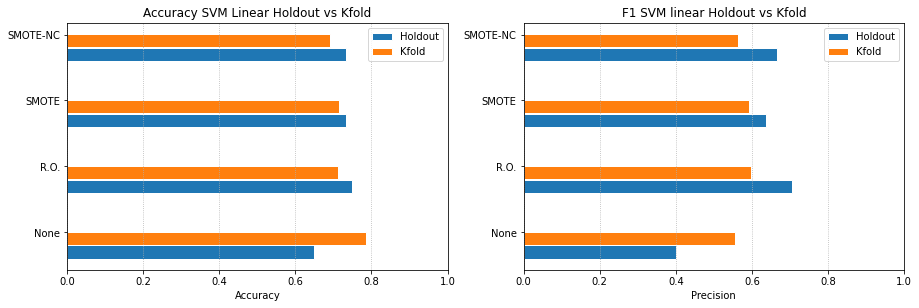

In [ ]:
fig = plt.figure(figsize=(15, 10))

barWidth = 0.2
space=0.01

plt.subplot(2, 2, 1)  
bars1 = [df_svm["Accuracy"][0], df_svm["Accuracy"][1], df_svm["Accuracy"][2], df_svm["Accuracy"][3]]
bars2 = [df_svm["Accuracy"][4], df_svm["Accuracy"][5], df_svm["Accuracy"][6], df_svm["Accuracy"][7]]

r1 = np.arange(len(bars1))
r2 = [x + barWidth + space for x in r1]

plt.barh(r1, bars1, label="Holdout",height=barWidth, edgecolor='white', )
plt.barh(r2, bars2, label="Kfold", height=barWidth, edgecolor='white',)


plt.title("Accuracy SVM Linear Holdout vs Kfold")
plt.yticks([r + barWidth*1.5 for r in range(len(bars1))], ["None", "R.O.", "SMOTE", "SMOTE-NC", ])
plt.xlim(0, 1)
plt.xlabel("Accuracy")
plt.gca().xaxis.grid(True, linestyle=':')
plt.legend();

plt.subplot(2, 2, 2) 
bars1 = [df_svm["f1"][0], df_svm["f1"][1], df_svm["f1"][2], df_svm["f1"][3]]
bars2 = [df_svm["f1"][4], df_svm["f1"][5], df_svm["f1"][6], df_svm["f1"][7]]

r1 = np.arange(len(bars1))
r2 = [x + barWidth + space for x in r1]

plt.barh(r1, bars1, label="Holdout",height=barWidth, edgecolor='white', )
plt.barh(r2, bars2, label="Kfold", height=barWidth, edgecolor='white',)


plt.title("F1 SVM linear Holdout vs Kfold")
plt.yticks([r + barWidth*1.5 for r in range(len(bars1))], ["None", "R.O.", "SMOTE", "SMOTE-NC", ])
plt.xlim(0, 1)
plt.xlabel("Precision")
plt.gca().xaxis.grid(True, linestyle=':')
plt.legend();

## RBF


In [ ]:
df_svm_rbf = pd.DataFrame(columns=['Model', 'Kfold', 'Oversampling Method', 'Kernel', 'Accuracy','Recall', 'Precision', 'f1'])

# no oversampling 
clf_svm = SVC(kernel="rbf", random_state=42, probability=True)

clf_svm.fit(X_train_holdout_st[features_whole_dataset], X_train_holdout_st["DEATH_EVENT"])
predictions = clf_svm.predict(X_test_holdout_st[features_whole_dataset])

accuracy, recall, precision, f1 = compute_metrics(X_test_holdout_st["DEATH_EVENT"], predictions)

dict_result = {'Model': 'SVM', 'Kfold': 'NO', 'Oversampling Method': 'None', 'Kernel': 'rbf', 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
df_svm_rbf = df_svm_rbf.append(dict_result, ignore_index = True)

# random oversampling 
clf_svm = SVC(kernel="rbf", random_state=42, probability=True)

X_train_oversampled, y_train_oversampled = make_oversampling(X_train_holdout_st[features_whole_dataset], X_train_holdout_st["DEATH_EVENT"], 'oversampling')

clf_svm.fit(X_train_oversampled, y_train_oversampled)
predictions = clf_svm.predict(X_test_holdout_st[features_whole_dataset])

accuracy, recall, precision, f1 = compute_metrics(X_test_holdout_st["DEATH_EVENT"], predictions)

dict_result = {'Model': 'SVM', 'Kfold': 'NO', 'Oversampling Method': 'oversampling', 'Kernel': 'rbf', 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
df_svm_rbf = df_svm_rbf.append(dict_result, ignore_index = True)

# smote
clf_svm = SVC(kernel="rbf", random_state=42, probability=True)

X_train_oversampled, y_train_oversampled = make_oversampling(X_train_holdout_st[features_whole_dataset], X_train_holdout_st["DEATH_EVENT"], 'smote')

clf_svm.fit(X_train_oversampled, y_train_oversampled)
predictions = clf_svm.predict(X_test_holdout_st[features_whole_dataset])

accuracy, recall, precision, f1 = compute_metrics(X_test_holdout_st["DEATH_EVENT"], predictions)

dict_result = {'Model': 'SVM', 'Kfold': 'NO', 'Oversampling Method': 'smote', 'Kernel': 'rbf', 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
df_svm_rbf = df_svm_rbf.append(dict_result, ignore_index = True)

# smoteNC
clf_svm = SVC(kernel="rbf", random_state=42, probability=True)

X_train_oversampled, y_train_oversampled = make_oversampling(X_train_holdout_st[features_whole_dataset], X_train_holdout_st["DEATH_EVENT"], 'smoteNC')

clf_svm.fit(X_train_oversampled, y_train_oversampled)
predictions = clf_svm.predict(X_test_holdout_st[features_whole_dataset])

accuracy, recall, precision, f1 = compute_metrics(X_test_holdout_st["DEATH_EVENT"], predictions)

dict_result = {'Model': 'SVM', 'Kfold': 'NO', 'Oversampling Method': 'smoteNC', 'Kernel': 'rbf', 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
df_svm_rbf = df_svm_rbf.append(dict_result, ignore_index = True)

In [ ]:
#KFOLD

# no oversampling 
clf_svm = SVC(kernel="rbf", random_state=42, probability=True)
    
accuracy, recall, precision, f1 = KFOLD_predictions(clf_svm, X_train, X_train["DEATH_EVENT"], 'no', kfold_features, 'svm') 

dict_result = {'Model': 'SVM', 'Kfold': 'YES', 'Oversampling Method': 'None', 'Kernel': 'rbf', 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
df_svm_rbf = df_svm_rbf.append(dict_result, ignore_index = True)

# oversampling
clf_svm = SVC(kernel="rbf", random_state=42, probability=True)
    
accuracy, recall, precision, f1 = KFOLD_predictions(clf_svm, X_train, X_train["DEATH_EVENT"], 'oversampling', kfold_features, 'svm') 

dict_result = {'Model': 'SVM', 'Kfold': 'YES', 'Oversampling Method': 'oversampling', 'Kernel': 'rbf', 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
df_svm_rbf = df_svm_rbf.append(dict_result, ignore_index = True)

# smote
clf_svm = SVC(kernel="rbf", random_state=42, probability=True)
    
accuracy, recall, precision, f1 = KFOLD_predictions(clf_svm, X_train, X_train["DEATH_EVENT"], 'smote', kfold_features, 'svm') 

dict_result = {'Model': 'SVM', 'Kfold': 'YES', 'Oversampling Method': 'smote', 'Kernel': 'rbf', 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
df_svm_rbf = df_svm_rbf.append(dict_result, ignore_index = True)

# smotenc
clf_svm = SVC(kernel="rbf", random_state=42, probability=True)
    
accuracy, recall, precision, f1 = KFOLD_predictions(clf_svm, X_train, X_train["DEATH_EVENT"], 'smoteNC', kfold_features, 'svm') 

dict_result = {'Model': 'SVM', 'Kfold': 'YES', 'Oversampling Method': 'smoteNC', 'Kernel': 'rbf', 'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'f1': f1}
df_svm_rbf = df_svm_rbf.append(dict_result, ignore_index = True)


In [ ]:
df_svm_rbf

,Model,Kfold,Oversampling Method,Kernel,Accuracy,Recall,Precision,f1
0,SVM,NO,None,rbf,0.683333,0.400000,0.714286,0.512821
1,SVM,NO,oversampling,rbf,0.766667,0.680000,0.739130,0.708333
2,SVM,NO,smote,rbf,0.733333,0.600000,0.714286,0.652174
3,SVM,NO,smoteNC,rbf,0.716667,0.560000,0.700000,0.622222
4,SVM,YES,None,rbf,0.769770,0.670216,0.448571,0.527376
5,SVM,YES,oversampling,rbf,0.770124,0.608859,0.689524,0.644066
6,SVM,YES,smote,rbf,0.749379,0.568889,0.732381,0.638290
7,SVM,YES,smoteNC,rbf,0.745213,0.560903,0.731429,0.632299


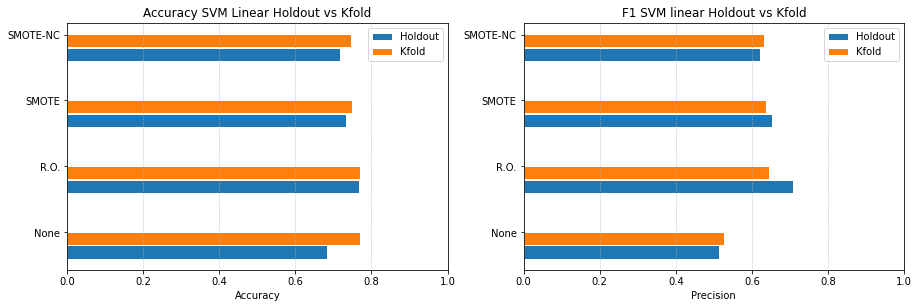

In [ ]:
fig = plt.figure(figsize=(15, 10))

barWidth = 0.2
space=0.01

plt.subplot(2, 2, 1)  
bars1 = [df_svm_rbf["Accuracy"][0], df_svm_rbf["Accuracy"][1], df_svm_rbf["Accuracy"][2], df_svm_rbf["Accuracy"][3]]
bars2 = [df_svm_rbf["Accuracy"][4], df_svm_rbf["Accuracy"][5], df_svm_rbf["Accuracy"][6], df_svm_rbf["Accuracy"][7]]

r1 = np.arange(len(bars1))
r2 = [x + barWidth + space for x in r1]

plt.barh(r1, bars1, label="Holdout",height=barWidth, edgecolor='white', )
plt.barh(r2, bars2, label="Kfold", height=barWidth, edgecolor='white',)


plt.title("Accuracy SVM Linear Holdout vs Kfold")
plt.yticks([r + barWidth*1.5 for r in range(len(bars1))], ["None", "R.O.", "SMOTE", "SMOTE-NC", ])
plt.xlim(0, 1)
plt.xlabel("Accuracy")
plt.gca().xaxis.grid(True, linestyle=':')
plt.legend();

plt.subplot(2, 2, 2) 
bars1 = [df_svm_rbf["f1"][0], df_svm_rbf["f1"][1], df_svm_rbf["f1"][2], df_svm_rbf["f1"][3]]
bars2 = [df_svm_rbf["f1"][4], df_svm_rbf["f1"][5], df_svm_rbf["f1"][6], df_svm_rbf["f1"][7]]

r1 = np.arange(len(bars1))
r2 = [x + barWidth + space for x in r1]

plt.barh(r1, bars1, label="Holdout",height=barWidth, edgecolor='white', )
plt.barh(r2, bars2, label="Kfold", height=barWidth, edgecolor='white',)


plt.title("F1 SVM linear Holdout vs Kfold")
plt.yticks([r + barWidth*1.5 for r in range(len(bars1))], ["None", "R.O.", "SMOTE", "SMOTE-NC", ])
plt.xlim(0, 1)
plt.xlabel("Precision")
plt.gca().xaxis.grid(True, linestyle=':')
plt.legend();

# acc, p, r, f1 =make_pred(best_model_rf, X_test[features_k_fold], y_test)

# Results

Finally, we report the final results in term of accuracy and F1 score.


## Accuracy

| Oversampling  | Decision Tree Accuracy | Random Forest Accuracy | Logistic Regression Accuracy |  SVM Linear Accuracy | SVM RBF Accuracy | 
| :------------- | :-------------: | :-------------: | :-------------: | :-------------: | :-------------: | 
| **None (Holdout)** | 0.733 |  0.750 |  0.650 | 0.650| 0.683| 
| **Random Oversampling (Holdout)** | 0.733 |  0.751	 |  0.750 | 0.750| 0.767 |
| **SMOTE (Holdout)** | 0.750 |  0.766 |  0.750 |0.733| 0.733|
| **SMOTE-NC (Holdout)** | 0.734 |  0.783 |  0.767 | 0.733| 0.717|
| **None + Kfold** | 0.769 |  0.786 | **0.779** | **0.782** |0.758 |
| **Random Oversampling + Kfold** | **0.773** |  **0.809** | 0.719 | 0.708| **0.775** |
| **SMOTE + Kfold** | 0.723 | 0.752 |  0.710 | 0.720| 0.741|
| **SMOTE-NC + Kfold** | 0.771 | 0.789 |  0.744 | 0.690|0.748|

We can see how most of the times SMOTE-NC performs better than SMOTE even if the difference is not so big.

Sometimes Random Oversampling performs better than the other oversampling technique in fact the best model is Random Forest with K-fold and Random Oversampling. 

Genarally, the use of oversampling techniques led better performances.

## F1

| Oversampling  | Decision Tree F1 |  Random Forest F1 | Logistic Regression F1 | SVM Linear F1 | SVM RBF F1 | 
| :------------- |  :-------------: | :-------------: | :-------------: | :-------------: | :-------------: | 
| **None (Holdout)** |  0.636 |  0.667 |  0.363 | 0.400|  0.512|
| **Random Oversampling (Holdout)** |  0.667 |  0.693 |  0.694 | 0.706|  0.708|
| **SMOTE (Holdout)** |  0.681 |  0.730 |  0.681 | 0.636|  0.652|
| **SMOTE-NC (Holdout)** |  0.667 | 0.745 |  0.708 |  0.667|0.622|
| **None + Kfold** |  0.511 |  0.600 | 0.525 | 0.555| 0.527|
| **Random Oversampling + Kfold** |  0.696 |  0.701 |  0.620 |  0.601| 0.666|
| **SMOTE + Kfold** |  0.550 |  0.645 |  0.580 | 0.600| 0.634|
| **SMOTE-NC + Kfold** | 0.590 |  0.668 |  0.648 | 0.555| 0.629|

Here, instead, we can see the f1 score. It confirms the fact the best model seems to be Random Forest. It is interesting to notice that the application of the oversampling techniques led higher performances in term of f1 score.

# Feature importances

As seen above, the best model is Random Forest. One advantage of Random Forest is that we can inspect its feature importances because could be crucial not only to have an accurate model but also to interpretate the model. In this sense, we can make a deeper analysis of its feature importances using Scikit-Learn.

Knowing feature importance can be important to get a better understanding of the model’s logic. We can not only verify it being correct but also work on improving the model by focusing only on the important variables. In fact, we can remove some variables that are not that significant and have similar or better performance in much shorter training time.

In our case since we did already a deep feature selection during the preprocessing phase, we analize them in oder to understand which are the features that mainly influence a possible heart failure. We did that for both Holdout and K-fold.

## For Holdout
We show here the feature importances for the Holdout method.


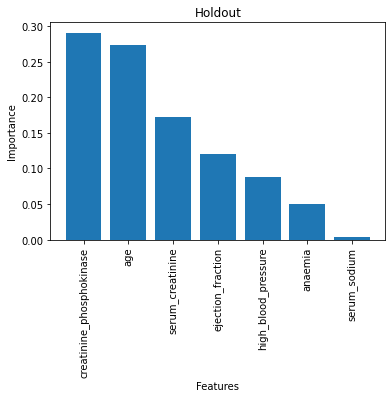

In [ ]:
clf_rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)
X_train_oversampled, y_train_oversampled = make_oversampling(X_train_holdout[features_whole_dataset], y_train_holdout, 'smoteNC')
clf_rf.fit(X_train_oversampled, y_train_oversampled)

importances_index_desc = np.argsort(clf_rf.feature_importances_)[::-1]
feature_labels = [features_whole_dataset[-i] for i in importances_index_desc]

# plot
plt.figure()
plt.bar(feature_labels, clf_rf.feature_importances_[importances_index_desc])
plt.xticks(feature_labels, rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.title('Holdout')
plt.show()

As we can see, the top 3 features for each iteration are: *creatinine_phosphokinase*, *age* and *serum_creatinine*. This could indicates that these three features can give us important information for a possible Heart Failure problem. 

## For K-fold

We show here the feature importances of each iteration of the K-fold.

In [ ]:
def features_importance_best_model(model, X, y, resampling_method, features_kfold, model_type=None):
  
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    for i, (train_idx, val_idx) in enumerate(skf.split(X, y)):

      X_fold = X[features_kfold[i]]

      X_train_kfold, X_val_kfold = X_fold.iloc[train_idx], X_fold.iloc[val_idx]
      y_train_kfold, y_val_kfold = y.iloc[train_idx], y.iloc[val_idx]

      feature_names = list(X_train_kfold.columns)
      
      model.fit(X_train_kfold, y_train_kfold)
      
      importances_index_desc = np.argsort(model.feature_importances_)[::-1]
      feature_labels = [feature_names[-i] for i in importances_index_desc]

      # plot
      plt.figure()
      plt.bar(feature_labels, model.feature_importances_[importances_index_desc])
      plt.xticks(feature_labels, rotation='vertical')
      plt.ylabel('Importance')
      plt.xlabel('Features')
      plt.title('Iteration ' + str(i+1))
      

    plt.show()
    

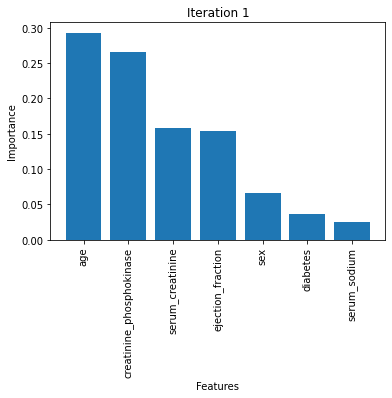

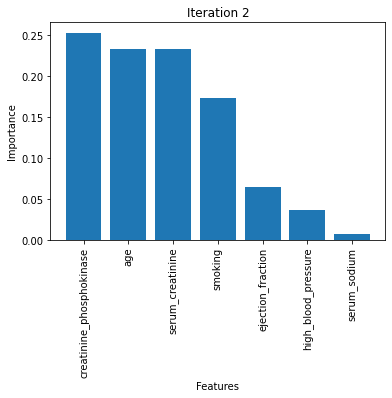

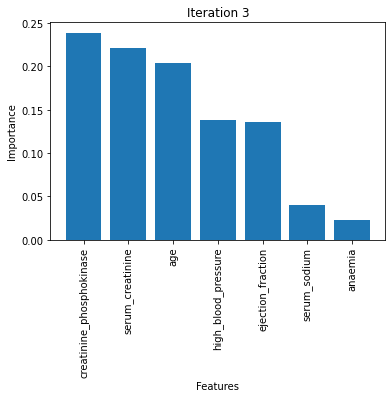

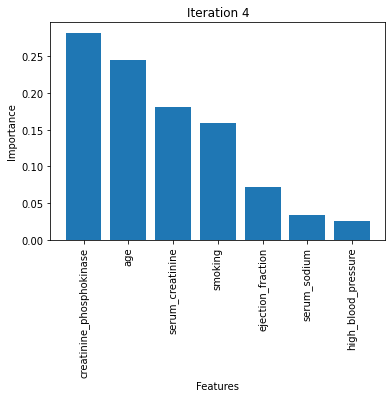

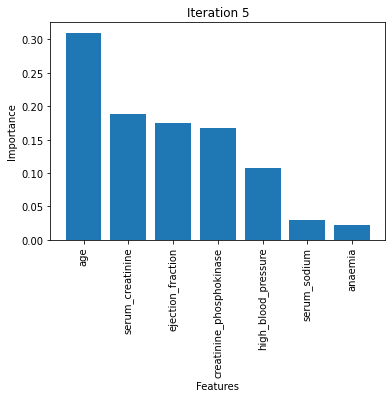

In [ ]:
clf_rf = RandomForestClassifier(n_estimators=5, max_depth=7, random_state=42)
features_importance_best_model(clf_rf, X_train, X_train["DEATH_EVENT"], 'oversampling', kfold_features)

We obtained similar results w.r.t the holdout, in fact, almost everytime, the top 3 features for each iteration are: *creatinine_phosphokinase*, *age* and *serum_creatinine*.

# References 

[1] Chicco, D., Jurman, G. Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Med Inform Decis Mak 20, 16 (2020). https://doi.org/10.1186/s12911-020-1023-5

[2] N. V. Chawla and K. W. Bowyer and L. O. Hall and W. P. Kegelmeyer, SMOTE: Synthetic Minority Over-sampling Technique. https://doi.org/10.48550/arXiv.1106.1813
